# Model selection *using feed forward selection*

The model is au gaussian model with gaussian prior, excpet sigma that has a gamma prior

$Y$~$N(X\theta , \sigma^2I_d)$ with as prior :
 - $\theta$~$N(0,\sigma_b^2I_p)$
 - $\sigma$~$Gamma(a,b)$

In [1]:
%matplotlib inline

from Baysian_framework import *
from Metropolis_hastings import *
from GVA import *
from Important_sampling import *

from Vizualisation_tool import *
from Model import *
from Model_torch import *

import seaborn as sns
import pandas as pd
import scipy as scp # optimization, probability densities and cumulative

In [2]:
df = pd.read_csv ('Real estate.csv')
# first drop usless variable 
data = df.drop(['No'],axis=1)

#Rename
data.rename(columns = {
                                'X1 transaction date': 'Date',
                                'X2 house age' : 'House_age',
                                'X3 distance to the nearest MRT station' : 'MRT_distance',
                                'X4 number of convenience stores' : 'Conv_store_count',
                                'X5 latitude' : 'Latitude',
                                'X6 longitude' : 'Longitude',
                                'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

X_names = [ 'Date' ,'House_age','MRT_distance','Conv_store_count','Latitude','Longitude' ]
Y_names = ['Price_per_unit' ]

data_tmp = data[data['Price_per_unit']<100]
data_no_outlier = data_tmp[data_tmp['Price_per_unit']>8]

#X= df[df.columns[1:-1]].to_numpy()

Y = (data_no_outlier['Price_per_unit']).to_numpy()

In [3]:
data_no_outlier['MRT_distance_sqrt'] = np.sqrt(data_no_outlier["MRT_distance"])

center_longitude_max = data_no_outlier['Longitude'][np.argmax(data_no_outlier['Price_per_unit'])]
center_latitude_max = data_no_outlier['Latitude'][np.argmax(data_no_outlier['Price_per_unit'])]
distance_center_vector_max = np.c_[data_no_outlier['Longitude'] - center_longitude_max,data_no_outlier['Latitude'] - center_latitude_max]
distance_vector_max = np.linalg.norm(distance_center_vector_max,axis=1)
orientation = np.arctan2(distance_center_vector_max[:,0],distance_center_vector_max[:,1])

data_no_outlier['dist_center'] = np.sqrt(distance_vector_max)
data_no_outlier['orientation'] = orientation





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [2]:
X_names = [ 'Date' ,'House_age','MRT_distance','Conv_store_count','Latitude','Longitude', 'MRT_distance_sqrt' ,'dist_center','orientation' ]

## Using Metropolis Hasting 

### Model feed forward selection :

We first select the best predictor with intercept based on the **AIC** BIC and AICc


##### First predictors

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 219.27it/s]


Acceptance rate :  0.5329
    features  Coeff   std                CI    2.5   25.0   50.0   75.0   97.5
0  intercept  37.33  0.70  [35.925, 38.731]  35.98  36.84  37.33  37.80  38.73
1       Date   0.44  0.69   [-0.947, 1.825]  -0.86  -0.05   0.45   0.91   1.81
2      sigma  12.83  0.49  [11.844, 13.813]  11.92  12.48  12.82  13.14  13.85
============ Fidelity summary ==================
 the mean square error is :  165.92834656247
 MSE test is :  182.0190607279097
 PVE is  :  0.0014052860947402716
 F   is  :  0.46016827756253614
 p value :  0.4980250976004549
 AIC is  :  2617.3581383533447
 BIC is  :  2624.9502538548754
 AICc is :  2617.3949481692957


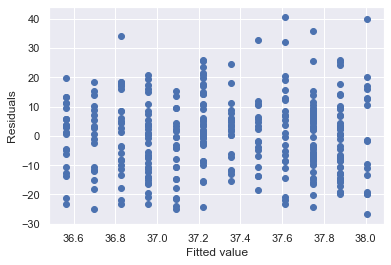

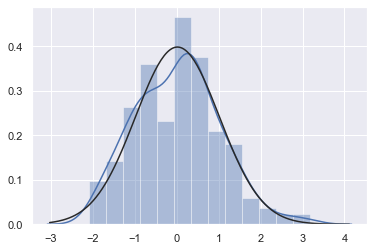

<Figure size 432x288 with 0 Axes>

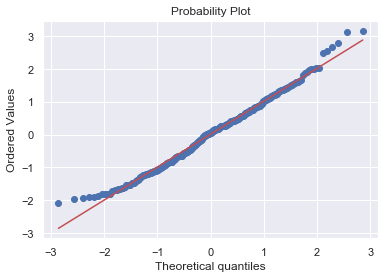

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 217.14it/s]


Acceptance rate :  0.5183
    features  Coeff   std                CI    2.5   25.0   50.0   75.0   97.5
0  intercept  37.33  0.66  [36.005, 38.645]  36.03  36.87  37.32  37.79  38.61
1  House_age  -3.06  0.64  [-4.340, -1.786]  -4.33  -3.49  -3.07  -2.62  -1.81
2      sigma  12.46  0.48  [11.494, 13.421]  11.57  12.13  12.43  12.76  13.49
============ Fidelity summary ==================
 the mean square error is :  156.4563757018035
 MSE test is :  185.16916971087568
 PVE is  :  0.061316552330623275
 F   is  :  21.293986538720286
 p value :  5.665494622664191e-06
 AIC is  :  2598.019830771972
 BIC is  :  2605.611946273503
 AICc is :  2598.056640587923


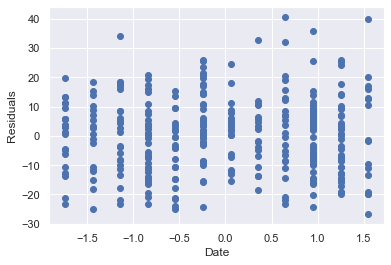

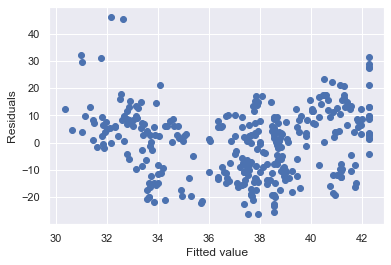

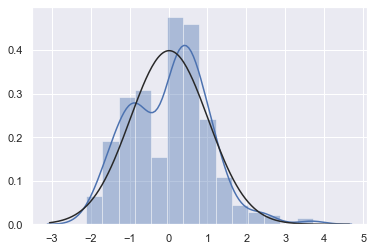

<Figure size 432x288 with 0 Axes>

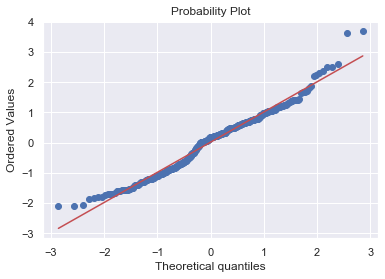

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:47<00:00, 212.34it/s]


Acceptance rate :  0.4067
       features  Coeff   std                CI    2.5   25.0   50.0   75.0  \
0     intercept  37.43  0.51  [36.401, 38.455]  36.46  37.05  37.44  37.78   
1  MRT_distance  -8.59  0.49  [-9.578, -7.606]  -9.58  -8.91  -8.60  -8.25   
2         sigma   9.38  0.37   [8.646, 10.111]   8.70   9.12   9.37   9.62   

    97.5  
0  38.46  
1  -7.65  
2  10.14  
============ Fidelity summary ==================
 the mean square error is :  88.23316725696994
 MSE test is :  78.78648774164023
 PVE is  :  0.4700859364348223
 F   is  :  289.4795592064759
 p value :  1.1102230246251565e-16
 AIC is  :  2409.5713001067556
 BIC is  :  2417.1634156082864
 AICc is :  2409.6081099227067


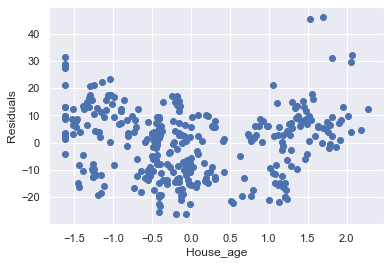

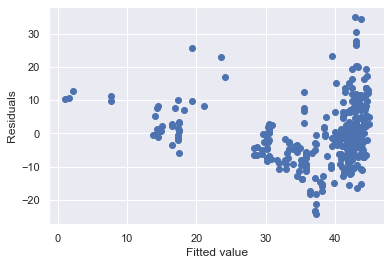

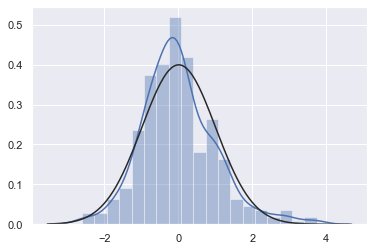

<Figure size 432x288 with 0 Axes>

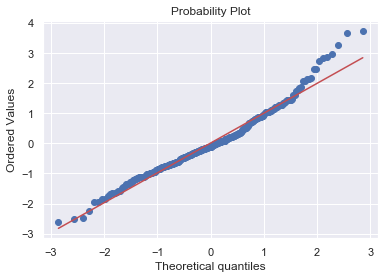

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 213.65it/s]


Acceptance rate :  0.4567
           features  Coeff   std                CI    2.5   25.0   50.0  \
0         intercept  37.42  0.56  [36.305, 38.545]  36.34  37.03  37.43   
1  Conv_store_count   7.58  0.57    [6.446, 8.708]   6.49   7.20   7.58   
2             sigma  10.33  0.40   [9.523, 11.137]   9.56  10.06  10.31   

    75.0   97.5  
0  37.81  38.52  
1   7.96   8.69  
2  10.59  11.19  
============ Fidelity summary ==================
 the mean square error is :  107.3218985292032
 MSE test is :  92.90108033082329
 PVE is  :  0.3464502932342626
 F   is  :  175.39818688481876
 p value :  1.1102230246251565e-16
 AIC is  :  2474.0044454448253
 BIC is  :  2481.596560946356
 AICc is :  2474.0412552607763


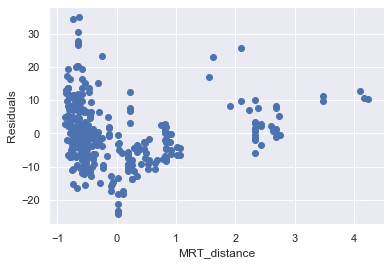

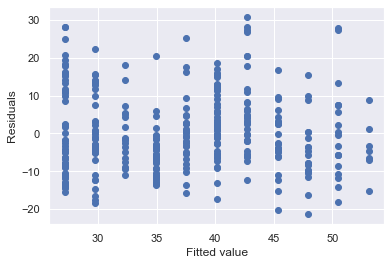

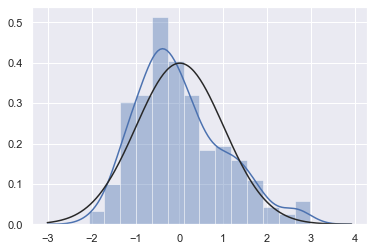

<Figure size 432x288 with 0 Axes>

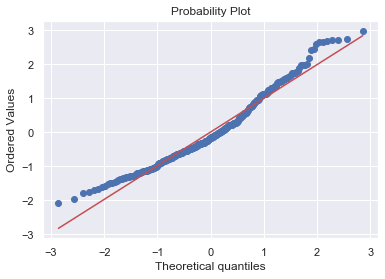

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 220.49it/s]


Acceptance rate :  0.4643
    features  Coeff   std                CI    2.5   25.0   50.0   75.0   97.5
0  intercept  37.40  0.58  [36.233, 38.570]  36.26  36.99  37.40  37.80  38.58
1   Latitude   6.75  0.58    [5.591, 7.918]   5.63   6.36   6.76   7.16   7.89
2      sigma  10.85  0.42  [10.003, 11.691]  10.08  10.55  10.83  11.11  11.73
============ Fidelity summary ==================
 the mean square error is :  118.098715526837
 MSE test is :  107.83503578435572
 PVE is  :  0.28153381906476416
 F   is  :  129.52628535854407
 p value :  1.1102230246251565e-16
 AIC is  :  2505.486721035527
 BIC is  :  2513.0788365370577
 AICc is :  2505.523530851478


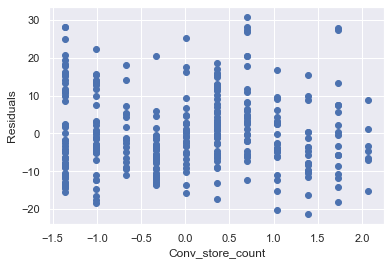

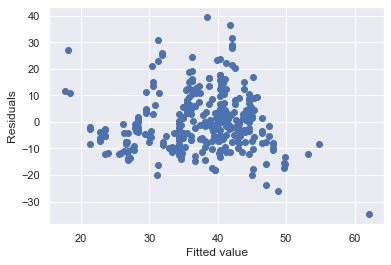

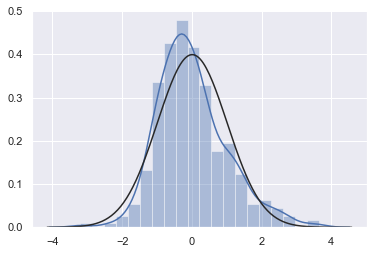

<Figure size 432x288 with 0 Axes>

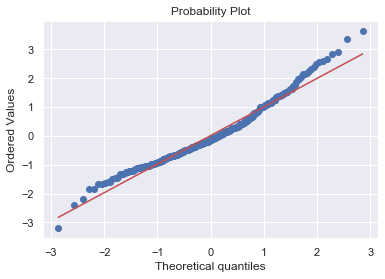

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 214.53it/s]


Acceptance rate :  0.4606
    features  Coeff   std                CI    2.5   25.0   50.0   75.0   97.5
0  intercept  37.40  0.59  [36.233, 38.575]  36.30  36.98  37.40  37.80  38.53
1  Longitude   7.17  0.57    [6.029, 8.313]   6.08   6.78   7.17   7.56   8.28
2      sigma  10.56  0.41   [9.737, 11.385]   9.80  10.28  10.54  10.83  11.41
============ Fidelity summary ==================
 the mean square error is :  111.91954073008611
 MSE test is :  139.74643972683327
 PVE is  :  0.3205362212622938
 F   is  :  155.6122229283434
 p value :  1.1102230246251565e-16
 AIC is  :  2487.8063355854456
 BIC is  :  2495.3984510869764
 AICc is :  2487.8431454013967


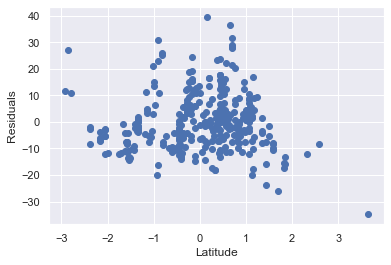

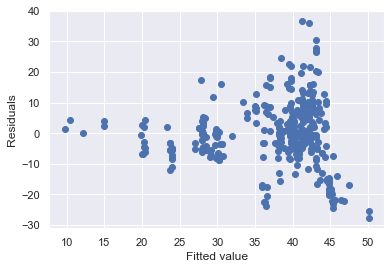

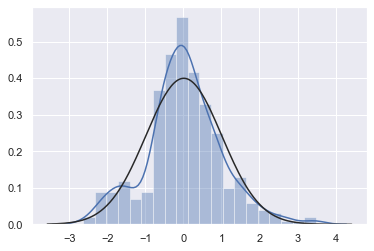

<Figure size 432x288 with 0 Axes>

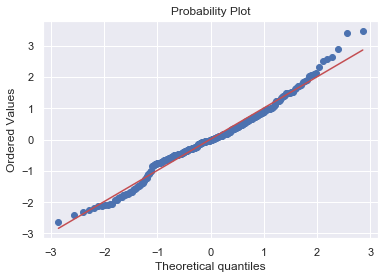

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:47<00:00, 209.58it/s]


Acceptance rate :  0.3663
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.44  0.46   [36.520, 38.367]  36.55  37.13  37.43   
1  MRT_distance_sqrt  -9.40  0.46  [-10.323, -8.467] -10.32  -9.72  -9.39   
2              sigma   8.60  0.33     [7.938, 9.266]   7.98   8.38   8.59   

    75.0   97.5  
0  37.75  38.37  
1  -9.08  -8.52  
2   8.81   9.29  
============ Fidelity summary ==================
 the mean square error is :  74.03687935590116
 MSE test is :  63.3768219811587
 PVE is  :  0.5538438556104541
 F   is  :  406.4543259346971
 p value :  1.1102230246251565e-16
 AIC is  :  2351.861966326609
 BIC is  :  2359.45408182814
 AICc is :  2351.89877614256


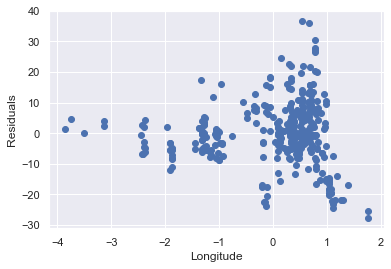

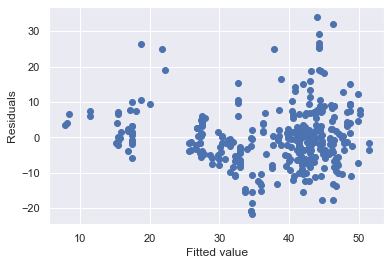

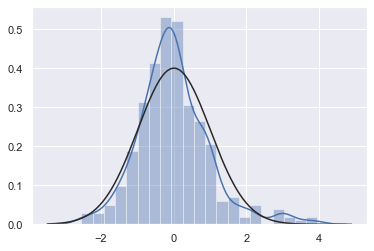

<Figure size 432x288 with 0 Axes>

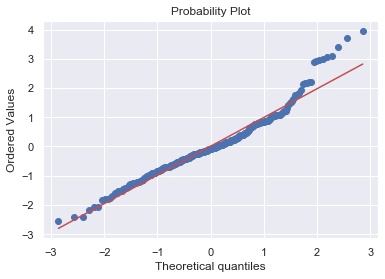

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 222.33it/s]


Acceptance rate :  0.4267
      features  Coeff   std                CI    2.5   25.0   50.0   75.0  \
0    intercept  37.42  0.54  [36.343, 38.502]  36.38  37.03  37.43  37.81   
1  dist_center  -8.51  0.52  [-9.547, -7.482]  -9.52  -8.86  -8.51  -8.18   
2        sigma   9.62  0.37   [8.873, 10.357]   8.90   9.36   9.60   9.86   

    97.5  
0  38.44  
1  -7.50  
2  10.39  
============ Fidelity summary ==================
 the mean square error is :  92.77573352699677
 MSE test is :  93.92737068472042
 PVE is  :  0.44192381619988735
 F   is  :  258.8126643689654
 p value :  1.1102230246251565e-16
 AIC is  :  2426.087514668332
 BIC is  :  2433.679630169863
 AICc is :  2426.124324484283


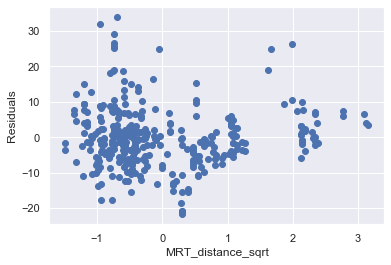

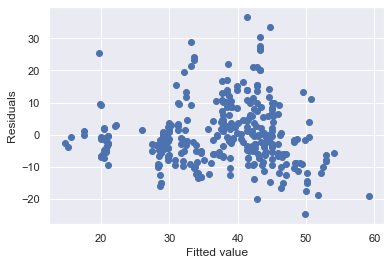

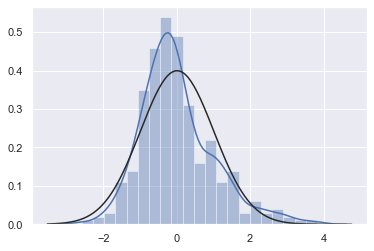

<Figure size 432x288 with 0 Axes>

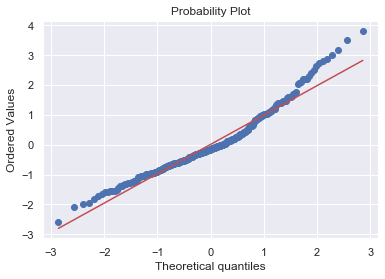

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 213.25it/s]


Acceptance rate :  0.4832
      features  Coeff   std                CI    2.5   25.0   50.0   75.0  \
0    intercept  37.38  0.62  [36.142, 38.625]  36.16  36.95  37.38  37.81   
1  orientation   5.74  0.60    [4.528, 6.947]   4.57   5.32   5.74   6.14   
2        sigma  11.43  0.44  [10.555, 12.302]  10.62  11.13  11.42  11.71   

    97.5  
0  38.62  
1   6.90  
2  12.35  
============ Fidelity summary ==================
 the mean square error is :  131.547606269154
 MSE test is :  130.39817195872914
 PVE is  :  0.202791055806996
 F   is  :  83.76032614916845
 p value :  1.1102230246251565e-16
 AIC is  :  2540.967957310595
 BIC is  :  2548.560072812126
 AICc is :  2541.004767126546


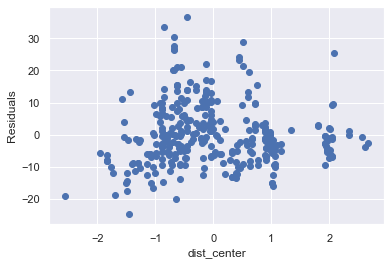

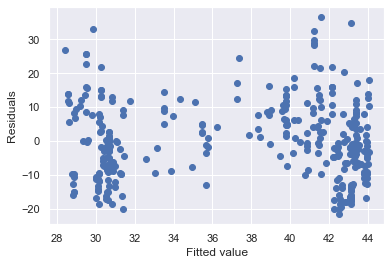

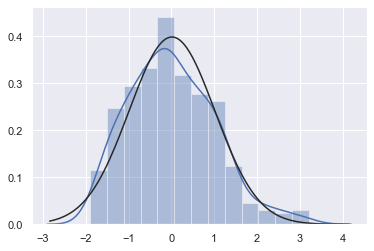

<Figure size 432x288 with 0 Axes>

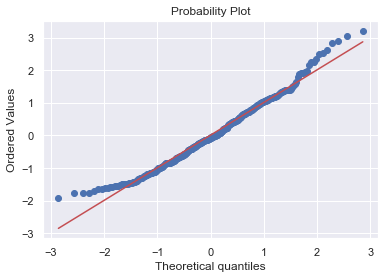

             feature         MSE       PVE           F         p_val  \
0               Date  165.928347  0.001405    0.460168  4.980251e-01   
1          House_age  156.456376  0.061317   21.293987  5.665495e-06   
2       MRT_distance   88.233167  0.470086  289.479559  1.110223e-16   
3   Conv_store_count  107.321899  0.346450  175.398187  1.110223e-16   
4           Latitude  118.098716  0.281534  129.526285  1.110223e-16   
5          Longitude  111.919541  0.320536  155.612223  1.110223e-16   
6  MRT_distance_sqrt   74.036879  0.553844  406.454326  1.110223e-16   
7        dist_center   92.775734  0.441924  258.812664  1.110223e-16   
8        orientation  131.547606  0.202791   83.760326  1.110223e-16   

           AIC         AICc          BIC  
0  2617.358138  2624.950254  2624.950254  
1  2598.019831  2605.611946  2605.611946  
2  2409.571300  2417.163416  2417.163416  
3  2474.004445  2481.596561  2481.596561  
4  2505.486721  2513.078837  2513.078837  
5  2487.806336  2495.

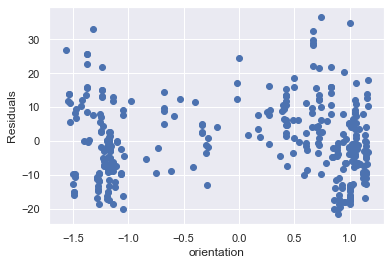

In [5]:
MSE = []
PVE = []
F =[]
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    Parameter = [ 'intercept' ,predictor ,'sigma']
    X = (data_no_outlier[[predictor]].dropna()).to_numpy()
    Model = Bayesian_framework(1,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)

    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.array( [10,10,10] )
    step_size = 0.5
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)
    

**Remarks :**
 - We can see that **MRT_distance_sqrt** seems to be the best coefficient
 - Residual vs MRT_distance suggest that we can add the square of MRT_distance


We keep **MRT_distance_sqrt** and we continue to select the second best predictor

##### Second predictors

In [6]:
X_names = [ 'Date' ,'House_age','MRT_distance','Conv_store_count','Latitude','Longitude','dist_center','orientation' ]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 204.27it/s]


Acceptance rate :  0.3032
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.39  0.46   [36.466, 38.314]  36.49  37.06  37.39   
1  MRT_distance_sqrt  -9.62  0.44  [-10.495, -8.749] -10.44  -9.92  -9.63   
2               Date   1.87  0.43     [1.020, 2.725]   1.02   1.60   1.89   
3              sigma   8.38  0.32     [7.727, 9.024]   7.73   8.17   8.37   

    75.0   97.5  
0  37.70  38.33  
1  -9.32  -8.76  
2   2.16   2.66  
3   8.59   9.03  
============ Fidelity summary ==================
 the mean square error is :  70.71426148681626
 MSE test is :  60.053927190683886
 PVE is  :  0.5712581339677633
 F   is  :  219.46633153816583
 p value :  1.1102230246251565e-16
 AIC is  :  2337.742971165441
 BIC is  :  2349.131144417737
 AICc is :  2337.816817319287


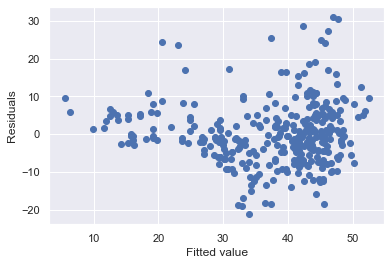

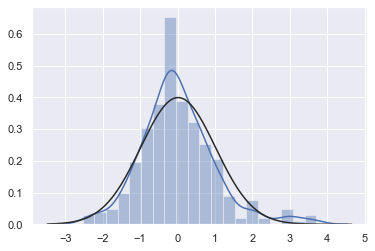

<Figure size 432x288 with 0 Axes>

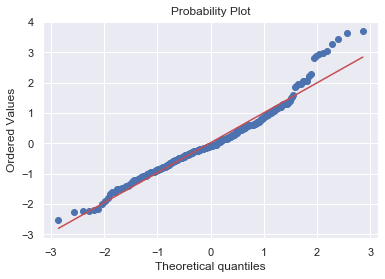

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 239.67it/s]


Acceptance rate :  0.284
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.42  0.44   [36.529, 38.303]  36.57  37.11  37.41   
1  MRT_distance_sqrt  -9.23  0.43  [-10.095, -8.368] -10.07  -9.52  -9.24   
2          House_age  -2.59  0.41   [-3.407, -1.772]  -3.41  -2.86  -2.57   
3              sigma   8.18  0.32     [7.535, 8.816]   7.58   7.95   8.17   

    75.0   97.5  
0  37.71  38.30  
1  -8.92  -8.38  
2  -2.31  -1.79  
3   8.38   8.82  
============ Fidelity summary ==================
 the mean square error is :  66.93124492112145
 MSE test is :  63.258707977252676
 PVE is  :  0.5917203647356398
 F   is  :  240.1762893648831
 p value :  1.1102230246251565e-16
 AIC is  :  2319.663743138532
 BIC is  :  2331.051916390828
 AICc is :  2319.7375892923783


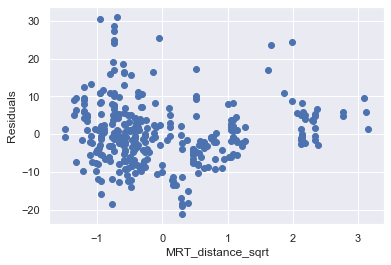

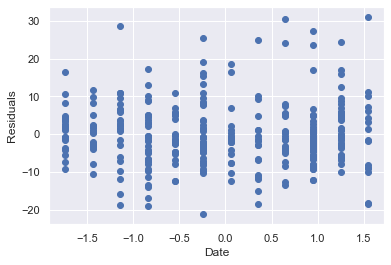

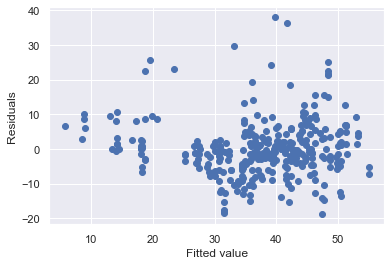

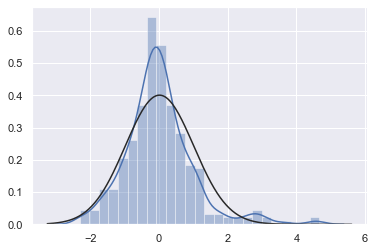

<Figure size 432x288 with 0 Axes>

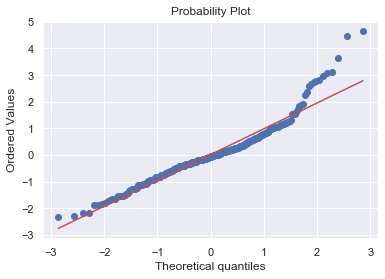

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 219.76it/s]


Acceptance rate :  0.3169
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.38  0.46    [36.467, 38.299]  36.46  37.08  37.39   
1  MRT_distance_sqrt -16.30  1.75  [-19.787, -12.805] -19.69 -17.49 -16.34   
2       MRT_distance   7.12  1.73     [3.660, 10.576]   3.97   5.86   7.11   
3              sigma   8.35  0.33      [7.688, 9.008]   7.71   8.11   8.35   

    75.0   97.5  
0  37.69  38.27  
1 -15.08 -13.05  
2   8.30  10.47  
3   8.55   9.04  
============ Fidelity summary ==================
 the mean square error is :  70.05982513367456
 MSE test is :  61.22262777902764
 PVE is  :  0.5647168109008145
 F   is  :  218.97986558387774
 p value :  1.1102230246251565e-16
 AIC is  :  2334.686224472795
 BIC is  :  2346.074397725091
 AICc is :  2334.760070626641


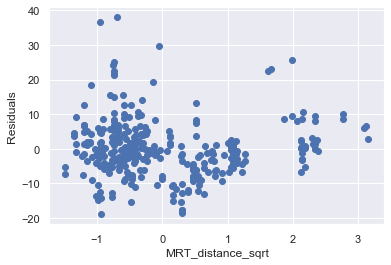

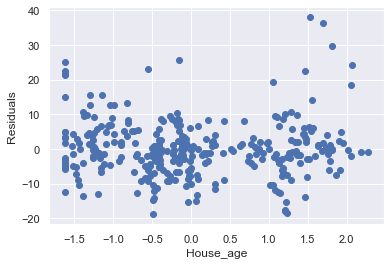

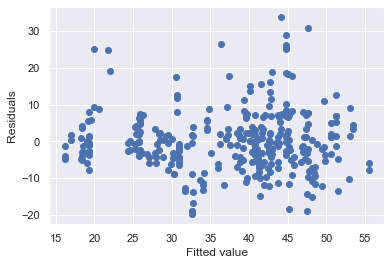

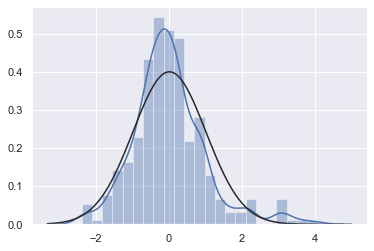

<Figure size 432x288 with 0 Axes>

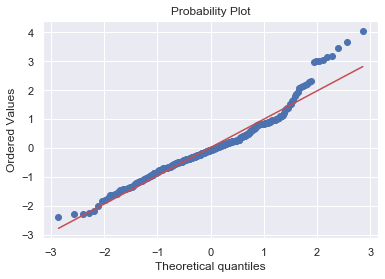

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 214.89it/s]


Acceptance rate :  0.3054
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.40  0.46  [36.482, 38.320]  36.52  37.10  37.39   
1  MRT_distance_sqrt  -7.77  0.56  [-8.900, -6.648]  -8.92  -8.15  -7.77   
2   Conv_store_count   2.52  0.59    [1.341, 3.705]   1.31   2.14   2.55   
3              sigma   8.39  0.33    [7.734, 9.047]   7.77   8.17   8.39   

    75.0   97.5  
0  37.72  38.31  
1  -7.40  -6.69  
2   2.93   3.66  
3   8.61   9.04  
============ Fidelity summary ==================
 the mean square error is :  70.67959984923262
 MSE test is :  58.5860379404019
 PVE is  :  0.5744463338008783
 F   is  :  220.79940436252986
 p value :  1.1102230246251565e-16
 AIC is  :  2337.5857797938215
 BIC is  :  2348.9739530461175
 AICc is :  2337.659625947668


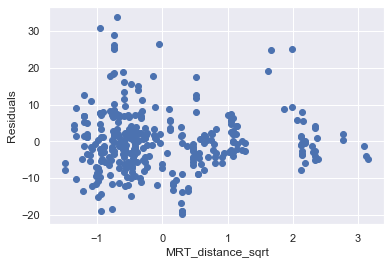

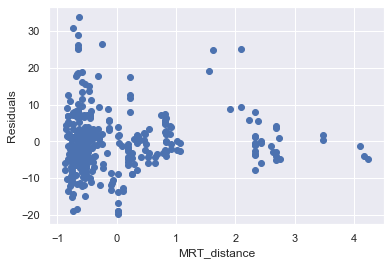

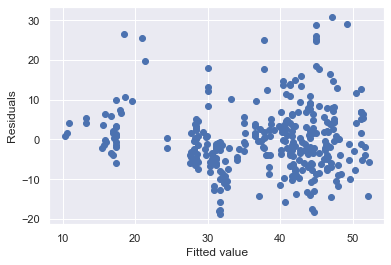

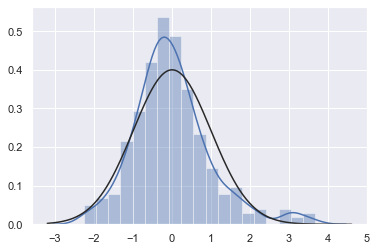

<Figure size 432x288 with 0 Axes>

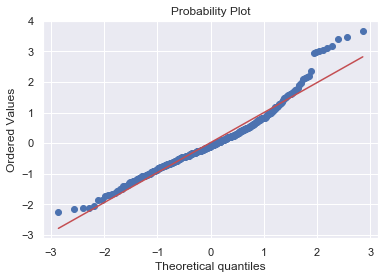

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 213.40it/s]


Acceptance rate :  0.3031
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.40  0.44  [36.514, 38.286]  36.51  37.11  37.41   
1  MRT_distance_sqrt  -8.02  0.52  [-9.051, -6.985]  -9.03  -8.36  -8.02   
2           Latitude   2.61  0.53    [1.548, 3.667]   1.56   2.25   2.62   
3              sigma   8.30  0.32    [7.667, 8.932]   7.70   8.08   8.29   

    75.0   97.5  
0  37.69  38.26  
1  -7.66  -7.01  
2   2.97   3.59  
3   8.51   8.94  
============ Fidelity summary ==================
 the mean square error is :  69.21739649718285
 MSE test is :  59.915821143469145
 PVE is  :  0.5814766810072532
 F   is  :  228.22307911577772
 p value :  1.1102230246251565e-16
 AIC is  :  2330.7068080423956
 BIC is  :  2342.0949812946915
 AICc is :  2330.780654196242


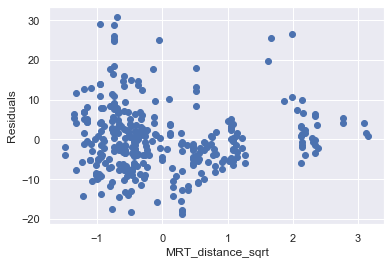

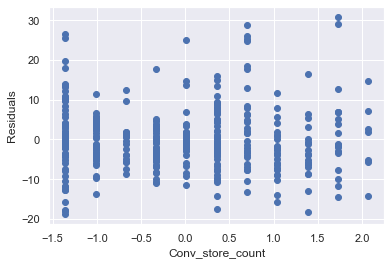

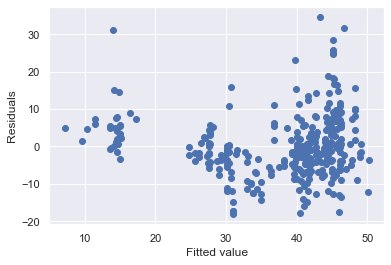

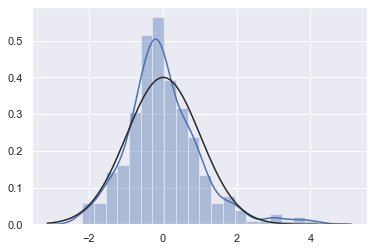

<Figure size 432x288 with 0 Axes>

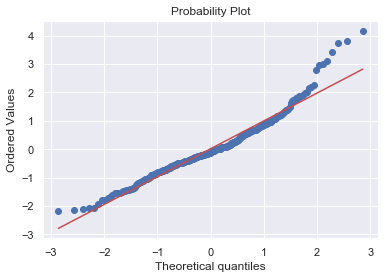

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 214.64it/s]


Acceptance rate :  0.3133
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.37  0.47   [36.429, 38.317]  36.44  37.06  37.38   
1  MRT_distance_sqrt -10.33  0.73  [-11.785, -8.873] -11.71 -10.84 -10.33   
2          Longitude  -1.20  0.73    [-2.665, 0.263]  -2.60  -1.71  -1.22   
3              sigma   8.56  0.32     [7.918, 9.201]   7.96   8.34   8.54   

    75.0   97.5  
0  37.68  38.28  
1  -9.83  -8.87  
2  -0.72   0.25  
3   8.76   9.24  
============ Fidelity summary ==================
 the mean square error is :  73.65388205254449
 MSE test is :  65.84483783980065
 PVE is  :  0.5519720907028937
 F   is  :  203.59354040256605
 p value :  1.1102230246251565e-16
 AIC is  :  2351.145297492957
 BIC is  :  2362.533470745253
 AICc is :  2351.2191436468033


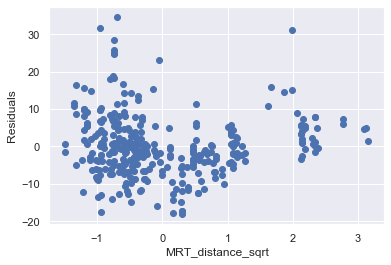

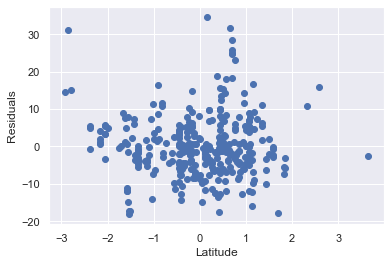

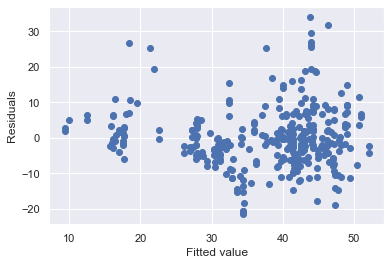

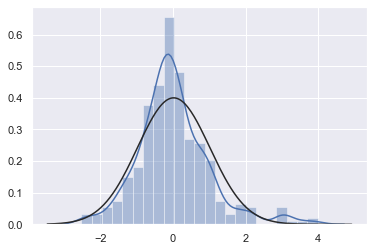

<Figure size 432x288 with 0 Axes>

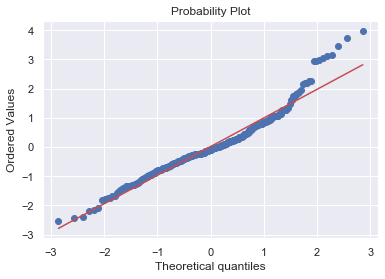

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 218.05it/s]


Acceptance rate :  0.3147
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.40  0.49  [36.425, 38.371]  36.44  37.07  37.40   
1  MRT_distance_sqrt  -7.33  0.69  [-8.700, -5.954]  -8.69  -7.80  -7.33   
2        dist_center  -2.60  0.71  [-4.016, -1.190]  -3.99  -3.09  -2.61   
3              sigma   8.45  0.33    [7.792, 9.100]   7.82   8.23   8.43   

    75.0   97.5  
0  37.72  38.36  
1  -6.89  -5.96  
2  -2.13  -1.23  
3   8.66   9.11  
============ Fidelity summary ==================
 the mean square error is :  71.78653780616744
 MSE test is :  64.00809400385984
 PVE is  :  0.5650918209131023
 F   is  :  213.8545676717329
 p value :  1.1102230246251565e-16
 AIC is  :  2342.6954397481813
 BIC is  :  2354.0836130004773
 AICc is :  2342.7692859020276


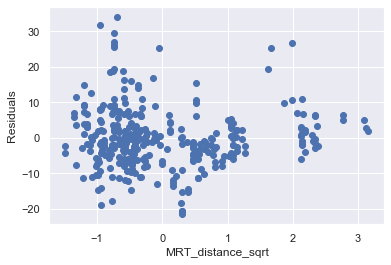

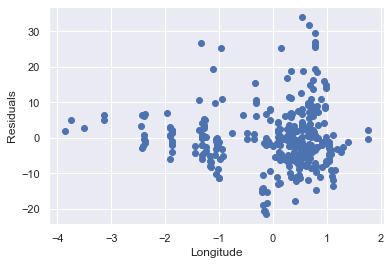

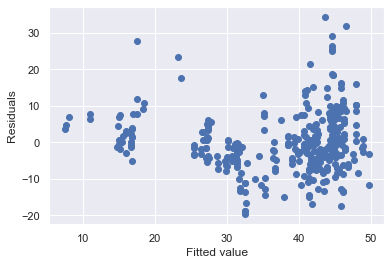

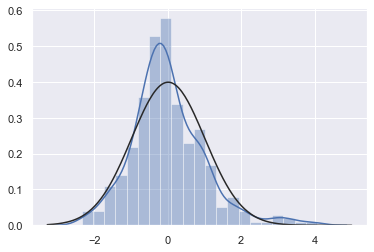

<Figure size 432x288 with 0 Axes>

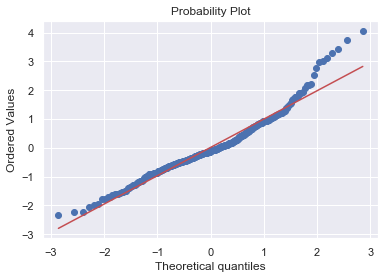

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 215.30it/s]


Acceptance rate :  0.3171
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.38  0.48   [36.414, 38.336]  36.38  37.08  37.39   
1  MRT_distance_sqrt  -9.11  0.56  [-10.231, -7.988] -10.17  -9.49  -9.12   
2        orientation   0.36  0.56    [-0.769, 1.490]  -0.76  -0.02   0.35   
3              sigma   8.58  0.33     [7.921, 9.244]   7.94   8.35   8.58   

    75.0   97.5  
0  37.70  38.30  
1  -8.72  -8.01  
2   0.74   1.42  
3   8.81   9.23  
============ Fidelity summary ==================
 the mean square error is :  74.22893317595306
 MSE test is :  63.45187174259345
 PVE is  :  0.5457957389464684
 F   is  :  199.75581900974035
 p value :  1.1102230246251565e-16
 AIC is  :  2353.7018385668885
 BIC is  :  2365.0900118191844
 AICc is :  2353.7756847207347


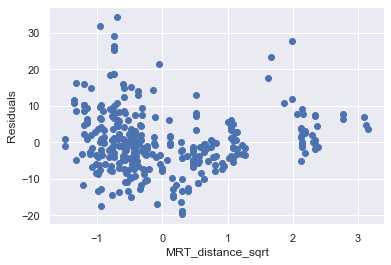

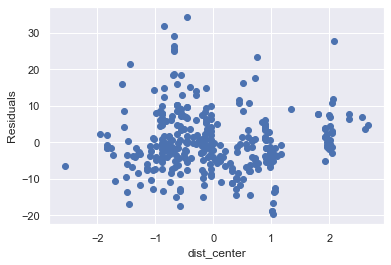

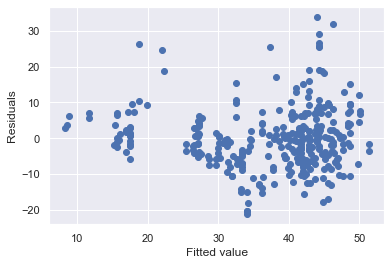

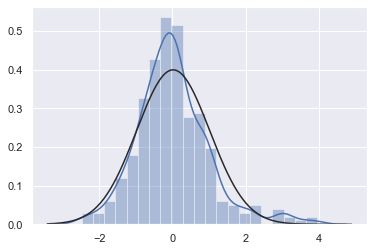

<Figure size 432x288 with 0 Axes>

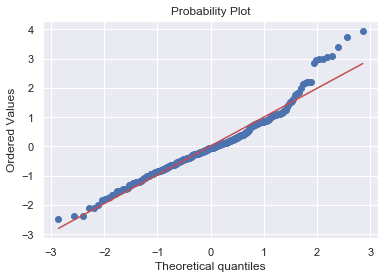

            feature        MSE       PVE           F         p_val  \
0              Date  70.714261  0.571258  219.466332  1.110223e-16   
1         House_age  66.931245  0.591720  240.176289  1.110223e-16   
2      MRT_distance  70.059825  0.564717  218.979866  1.110223e-16   
3  Conv_store_count  70.679600  0.574446  220.799404  1.110223e-16   
4          Latitude  69.217396  0.581477  228.223079  1.110223e-16   
5         Longitude  73.653882  0.551972  203.593540  1.110223e-16   
6       dist_center  71.786538  0.565092  213.854568  1.110223e-16   
7       orientation  74.228933  0.545796  199.755819  1.110223e-16   

           AIC         AICc          BIC  
0  2337.742971  2349.131144  2349.131144  
1  2319.663743  2331.051916  2331.051916  
2  2334.686224  2346.074398  2346.074398  
3  2337.585780  2348.973953  2348.973953  
4  2330.706808  2342.094981  2342.094981  
5  2351.145297  2362.533471  2362.533471  
6  2342.695440  2354.083613  2354.083613  
7  2353.701839  2365.0900

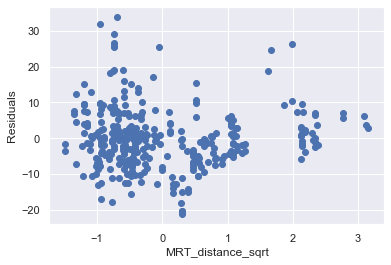

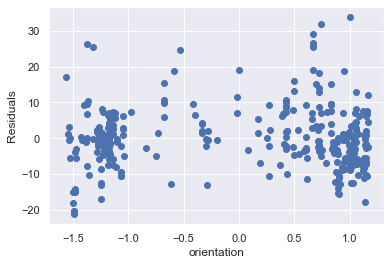

In [7]:
MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' , predictor ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt' , predictor ,'sigma']
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(2,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)

    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.array( [10,10,10,10] )
    step_size = 0.5
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

We keep **MRT_distance_sqrt**, **House_age** and we continue to select the third best predictor

##### Third predictors

In [5]:

X_names = [ 'Date' ,'dist_center' ,'MRT_distance','Conv_store_count','Latitude','Longitude','orientation' ]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 223.52it/s]


Acceptance rate :  0.2291
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.37  0.43   [36.503, 38.233]  36.49  37.08  37.37   
1  MRT_distance_sqrt  -9.51  0.43  [-10.365, -8.652] -10.37  -9.80  -9.50   
2          House_age  -2.60  0.41   [-3.417, -1.790]  -3.41  -2.87  -2.60   
3               Date   1.92  0.44     [1.047, 2.802]   1.11   1.62   1.93   
4              sigma   7.95  0.31     [7.327, 8.569]   7.36   7.72   7.94   

    75.0   97.5  
0  37.67  38.18  
1  -9.20  -8.69  
2  -2.32  -1.84  
3   2.23   2.77  
4   8.15   8.55  
============ Fidelity summary ==================
 the mean square error is :  63.44010218758156
 MSE test is :  59.31413438748609
 PVE is  :  0.615120454705817
 F   is  :  175.60931690033112
 p value :  1.1102230246251565e-16
 AIC is  :  2303.0289835289345
 BIC is  :  2318.213214531996
 AICc is :  2303.152440319058


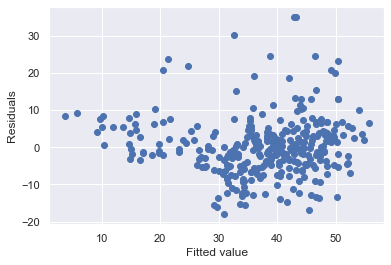

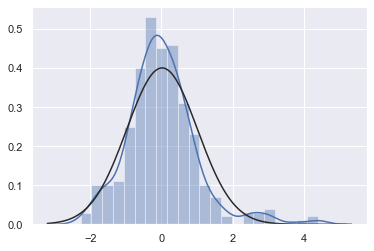

<Figure size 432x288 with 0 Axes>

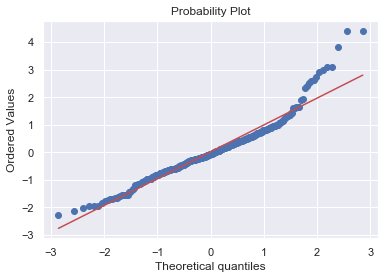

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 218.03it/s]


Acceptance rate :  0.2304
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.35  0.41  [36.519, 38.175]  36.55  37.07  37.36   
1  MRT_distance_sqrt  -6.26  0.73  [-7.709, -4.807]  -7.79  -6.73  -6.24   
2          House_age  -3.13  0.43  [-4.003, -2.265]  -3.96  -3.41  -3.13   
3        dist_center  -3.81  0.76  [-5.334, -2.291]  -5.23  -4.35  -3.85   
4              sigma   7.88  0.30    [7.276, 8.476]   7.33   7.66   7.87   

    75.0   97.5  
0  37.62  38.17  
1  -5.76  -4.87  
2  -2.83  -2.29  
3  -3.30  -2.22  
4   8.07   8.50  
============ Fidelity summary ==================
 the mean square error is :  62.09698340808224
 MSE test is :  61.84374398384236
 PVE is  :  0.627759346404242
 F   is  :  183.09392833203046
 p value :  1.1102230246251565e-16
 AIC is  :  2295.998801487044
 BIC is  :  2311.1830324901057
 AICc is :  2296.1222582771675


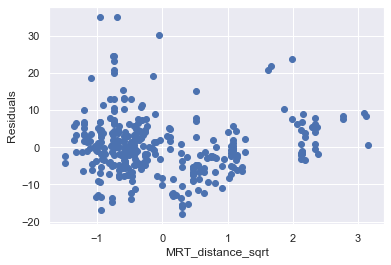

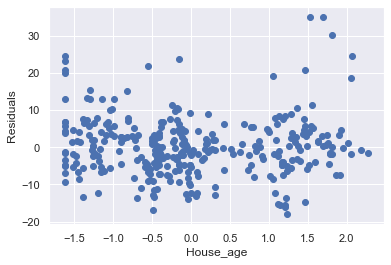

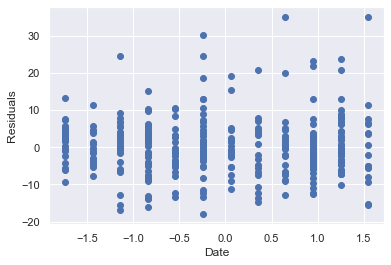

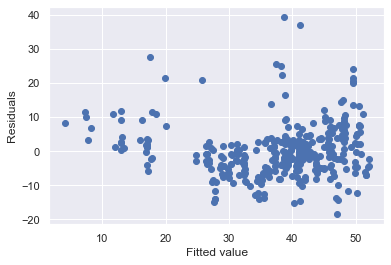

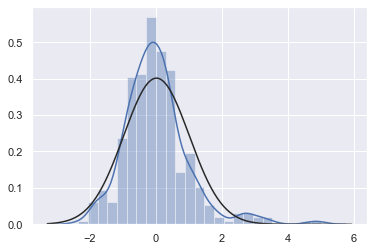

<Figure size 432x288 with 0 Axes>

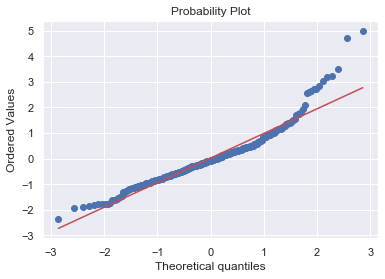

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 215.73it/s]


Acceptance rate :  0.2364
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.35  0.44    [36.475, 38.223]  36.51  37.05  37.34   
1  MRT_distance_sqrt -15.67  1.61  [-18.885, -12.448] -19.05 -16.73 -15.56   
2          House_age  -2.56  0.41    [-3.381, -1.749]  -3.40  -2.83  -2.56   
3       MRT_distance   6.58  1.62      [3.335, 9.830]   3.74   5.35   6.50   
4              sigma   7.94  0.30      [7.328, 8.543]   7.38   7.74   7.92   

    75.0   97.5  
0  37.64  38.23  
1 -14.42 -12.85  
2  -2.29  -1.79  
3   7.66   9.96  
4   8.13   8.57  
============ Fidelity summary ==================
 the mean square error is :  63.26449178908948
 MSE test is :  61.00868953431126
 PVE is  :  0.6072781088839527
 F   is  :  173.85166759275214
 p value :  1.1102230246251565e-16
 AIC is  :  2302.1161058180237
 BIC is  :  2317.3003368210852
 AICc is :  2302.239562608147


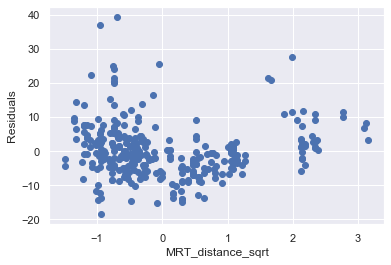

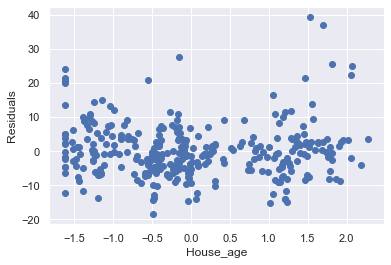

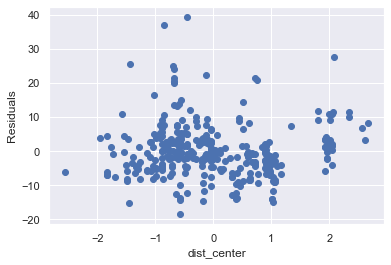

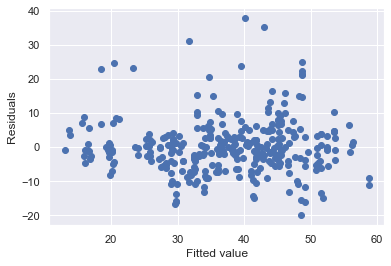

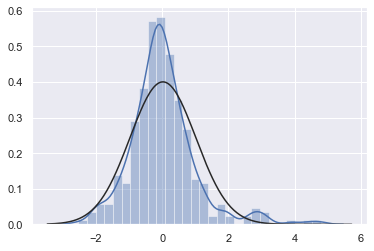

<Figure size 432x288 with 0 Axes>

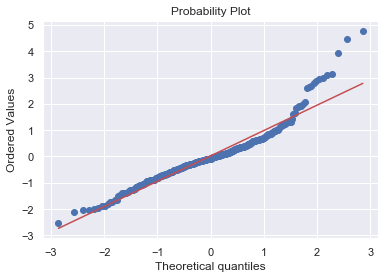

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 214.62it/s]


Acceptance rate :  0.2269
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.39  0.42  [36.544, 38.242]  36.56  37.11  37.39   
1  MRT_distance_sqrt  -7.43  0.55  [-8.528, -6.328]  -8.49  -7.77  -7.43   
2          House_age  -2.78  0.40  [-3.586, -1.978]  -3.55  -3.06  -2.78   
3   Conv_store_count   2.83  0.57    [1.697, 3.967]   1.77   2.45   2.83   
4              sigma   7.90  0.31    [7.289, 8.513]   7.34   7.68   7.89   

    75.0   97.5  
0  37.68  38.24  
1  -7.06  -6.33  
2  -2.51  -2.01  
3   3.22   3.92  
4   8.11   8.53  
============ Fidelity summary ==================
 the mean square error is :  62.463920936330986
 MSE test is :  57.451344616585516
 PVE is  :  0.6204176153581064
 F   is  :  179.8896333677703
 p value :  1.1102230246251565e-16
 AIC is  :  2297.9390038187116
 BIC is  :  2313.123234821773
 AICc is :  2298.062460608835


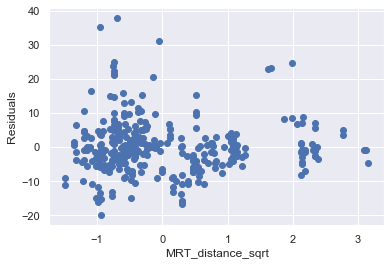

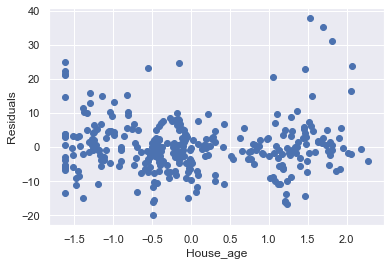

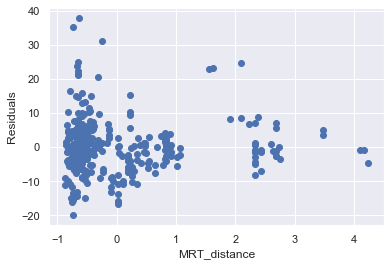

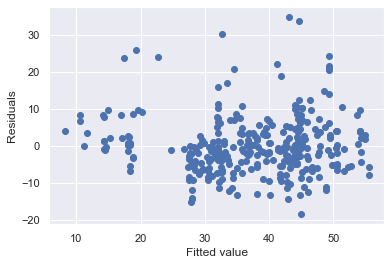

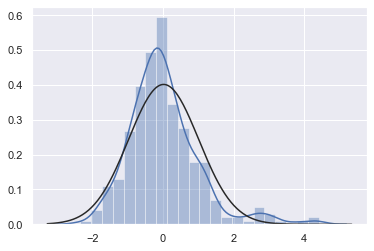

<Figure size 432x288 with 0 Axes>

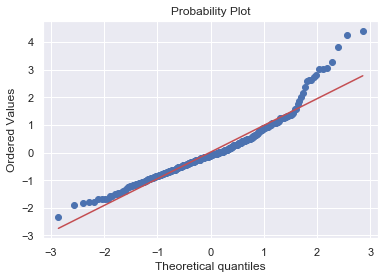

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 223.78it/s]


Acceptance rate :  0.2224
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.35  0.44  [36.469, 38.225]  36.44  37.06  37.34   
1  MRT_distance_sqrt  -7.77  0.50  [-8.771, -6.763]  -8.70  -8.12  -7.79   
2          House_age  -2.78  0.41  [-3.599, -1.954]  -3.60  -3.05  -2.77   
3           Latitude   2.82  0.50    [1.831, 3.819]   1.89   2.50   2.81   
4              sigma   7.81  0.30    [7.204, 8.418]   7.23   7.60   7.80   

    75.0   97.5  
0  37.63  38.20  
1  -7.45  -6.69  
2  -2.50  -2.00  
3   3.14   3.86  
4   8.02   8.41  
============ Fidelity summary ==================
 the mean square error is :  61.144442713556366
 MSE test is :  58.0163087134075
 PVE is  :  0.6291543154130056
 F   is  :  186.35946165060346
 p value :  1.1102230246251565e-16
 AIC is  :  2290.909301447351
 BIC is  :  2306.0935324504126
 AICc is :  2291.0327582374744


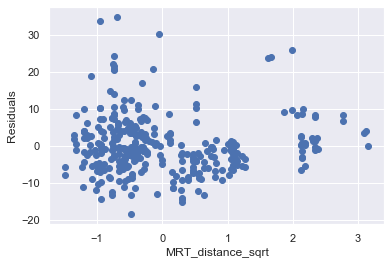

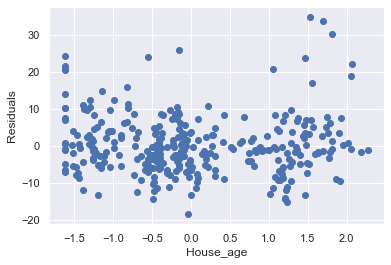

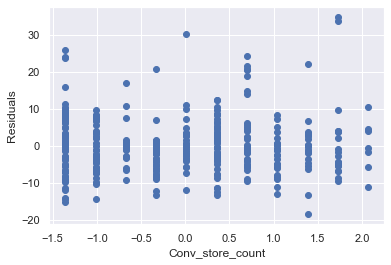

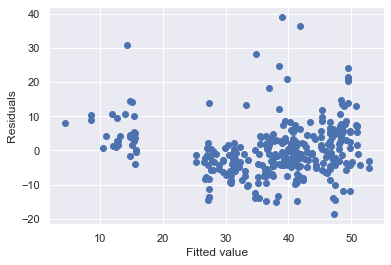

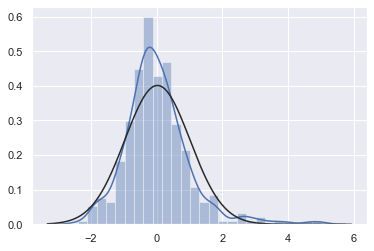

<Figure size 432x288 with 0 Axes>

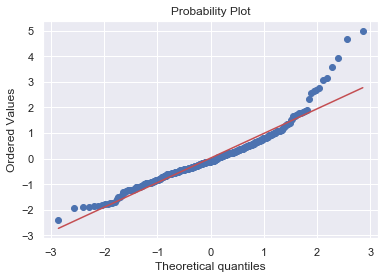

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 224.82it/s]


Acceptance rate :  0.2392
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.35  0.44   [36.480, 38.221]  36.47  37.05  37.35   
1  MRT_distance_sqrt -10.27  0.67  [-11.612, -8.926] -11.67 -10.73 -10.28   
2          House_age  -2.62  0.41   [-3.436, -1.800]  -3.43  -2.90  -2.62   
3          Longitude  -1.27  0.69    [-2.653, 0.103]  -2.61  -1.73  -1.31   
4              sigma   8.13  0.31     [7.513, 8.756]   7.55   7.91   8.12   

    75.0   97.5  
0  37.66  38.17  
1  -9.82  -8.93  
2  -2.33  -1.82  
3  -0.80   0.15  
4   8.35   8.74  
============ Fidelity summary ==================
 the mean square error is :  66.53256608629093
 MSE test is :  64.75173322201186
 PVE is  :  0.5966243239911585
 F   is  :  162.4119346694958
 p value :  1.1102230246251565e-16
 AIC is  :  2318.685181877412
 BIC is  :  2333.8694128804736
 AICc is :  2318.8086386675354


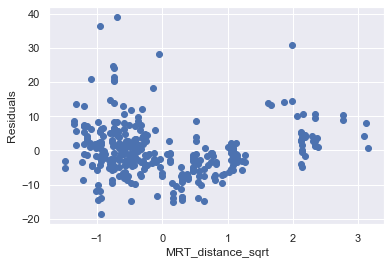

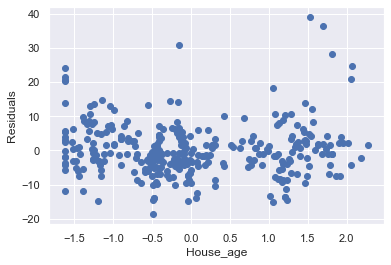

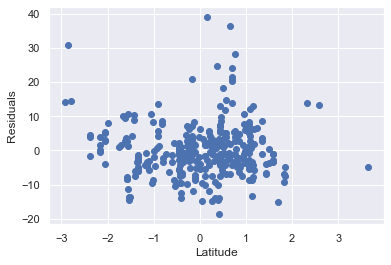

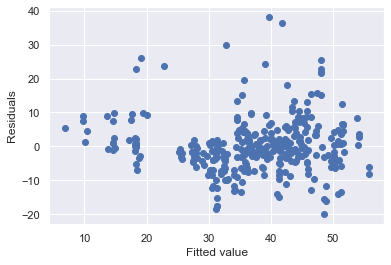

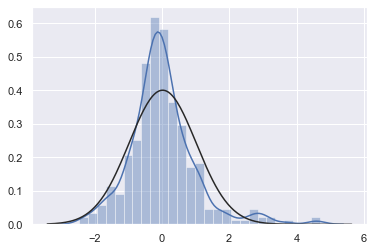

<Figure size 432x288 with 0 Axes>

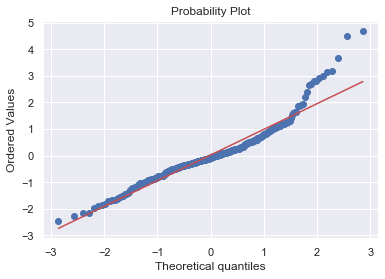

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 220.60it/s]


Acceptance rate :  0.2482
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.33  0.46   [36.411, 38.242]  36.40  37.02  37.33   
1  MRT_distance_sqrt  -9.02  0.55  [-10.121, -7.909] -10.05  -9.39  -9.04   
2          House_age  -2.60  0.42   [-3.439, -1.770]  -3.40  -2.89  -2.61   
3        orientation   0.34  0.56    [-0.781, 1.455]  -0.79  -0.02   0.33   
4              sigma   8.19  0.31     [7.568, 8.816]   7.62   7.97   8.19   

    75.0   97.5  
0  37.63  38.21  
1  -8.63  -7.88  
2  -2.33  -1.76  
3   0.70   1.45  
4   8.40   8.83  
============ Fidelity summary ==================
 the mean square error is :  67.11118581583177
 MSE test is :  63.37617669908017
 PVE is  :  0.5908142256443254
 F   is  :  159.44367271115863
 p value :  1.1102230246251565e-16
 AIC is  :  2321.550852736107
 BIC is  :  2336.7350837391687
 AICc is :  2321.6743095262304


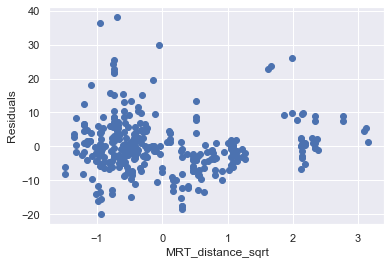

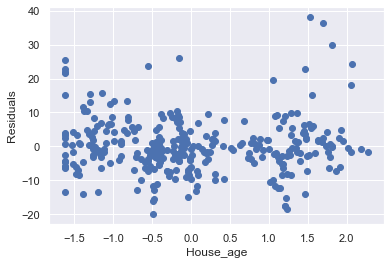

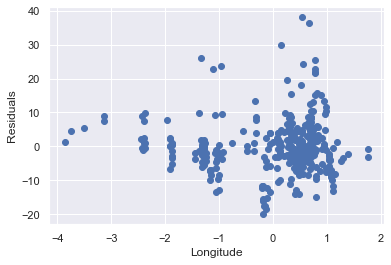

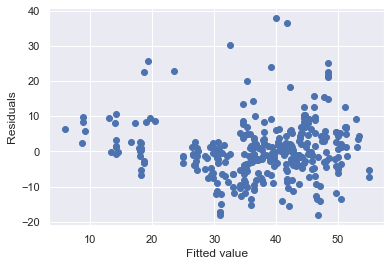

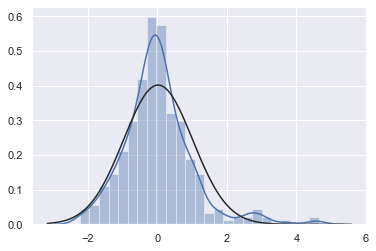

<Figure size 432x288 with 0 Axes>

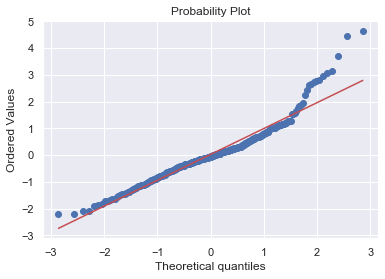

            feature        MSE       PVE           F         p_val  \
0              Date  63.440102  0.615120  175.609317  1.110223e-16   
1       dist_center  62.096983  0.627759  183.093928  1.110223e-16   
2      MRT_distance  63.264492  0.607278  173.851668  1.110223e-16   
3  Conv_store_count  62.463921  0.620418  179.889633  1.110223e-16   
4          Latitude  61.144443  0.629154  186.359462  1.110223e-16   
5         Longitude  66.532566  0.596624  162.411935  1.110223e-16   
6       orientation  67.111186  0.590814  159.443673  1.110223e-16   

           AIC         AICc          BIC  
0  2303.028984  2318.213215  2318.213215  
1  2295.998801  2311.183032  2311.183032  
2  2302.116106  2317.300337  2317.300337  
3  2297.939004  2313.123235  2313.123235  
4  2290.909301  2306.093532  2306.093532  
5  2318.685182  2333.869413  2333.869413  
6  2321.550853  2336.735084  2336.735084  


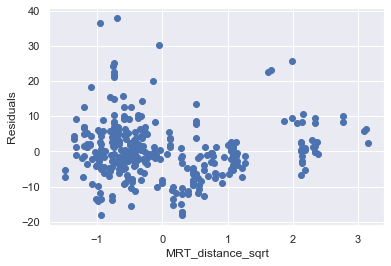

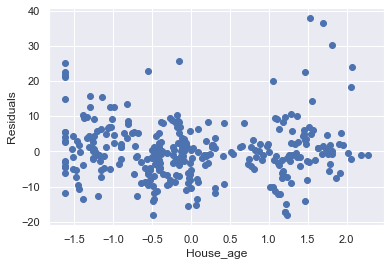

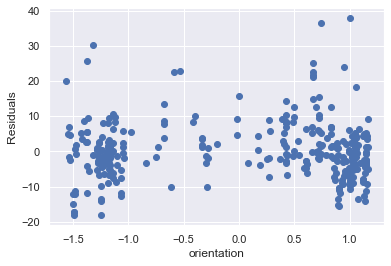

In [6]:
MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' , 'House_age', predictor   ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt', 'House_age', predictor ,'sigma']
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(3,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)
   
    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.array( [10,10,10,10,10] )
    step_size = 0.5
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

We keep **MRT_distance_sqrt**, **Latitude**, **House_age** and we continue to select the third best predictor

##### Fourth predictors

In [11]:
X_names = [ 'Date' , 'MRT_distance' , 'Conv_store_count' , 'Longitude' ,'dist_center' , 'orientation' ]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 220.79it/s]


Acceptance rate :  0.1803
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.29  0.42  [36.451, 38.120]  36.50  37.01  37.29   
1  MRT_distance_sqrt  -8.08  0.53  [-9.144, -7.019]  -9.24  -8.45  -8.04   
2           Latitude   2.67  0.50    [1.655, 3.675]   1.66   2.34   2.67   
3          House_age  -2.77  0.41  [-3.582, -1.961]  -3.57  -3.04  -2.78   
4               Date   1.68  0.43    [0.823, 2.533]   0.83   1.39   1.68   
5              sigma   7.65  0.31    [7.030, 8.275]   7.04   7.45   7.65   

    75.0   97.5  
0  37.57  38.10  
1  -7.72  -7.07  
2   2.98   3.67  
3  -2.49  -2.00  
4   1.97   2.49  
5   7.85   8.28  
============ Fidelity summary ==================
 the mean square error is :  58.514119581767865
 MSE test is :  54.73674280537178
 PVE is  :  0.6464818106331365
 F   is  :  150.07493262768193
 p value :  1.1102230246251565e-16
 AIC is  :  2277.4549983369893
 BIC is  :  2296.435287090816
 AICc is :  2277.640756850

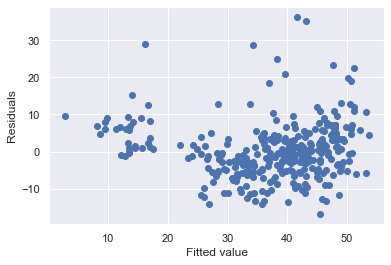

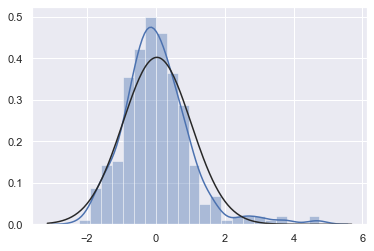

<Figure size 432x288 with 0 Axes>

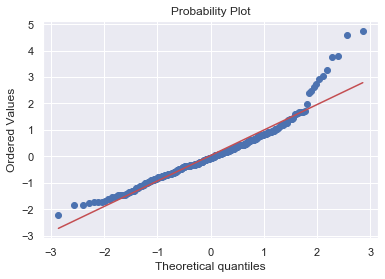

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 218.38it/s]


Acceptance rate :  0.1809
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.35  0.41    [36.526, 38.179]  36.55  37.07  37.35   
1  MRT_distance_sqrt -16.24  1.46  [-19.166, -13.317] -19.06 -17.22 -16.28   
2           Latitude   3.44  0.49      [2.454, 4.433]   2.49   3.11   3.46   
3          House_age  -2.72  0.39    [-3.499, -1.935]  -3.51  -2.98  -2.73   
4       MRT_distance   9.04  1.48     [6.080, 12.005]   6.04   8.06   9.13   
5              sigma   7.40  0.30      [6.800, 7.993]   6.85   7.20   7.40   

    75.0   97.5  
0  37.64  38.17  
1 -15.28 -13.34  
2   3.80   4.38  
3  -2.43  -2.00  
4  10.05  11.84  
5   7.59   7.99  
============ Fidelity summary ==================
 the mean square error is :  54.53097311208578
 MSE test is :  52.20255694801996
 PVE is  :  0.6499807994854538
 F   is  :  161.9085568542179
 p value :  1.1102230246251565e-16
 AIC is  :  2254.274622700235
 BIC is  :  2273.2549114540616
 AICc is :  22

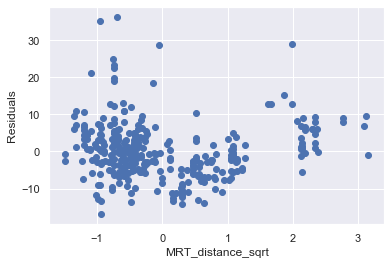

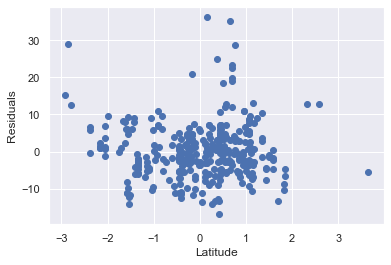

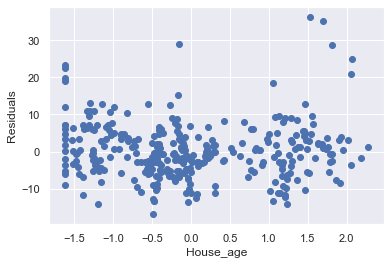

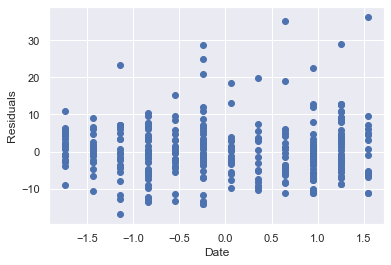

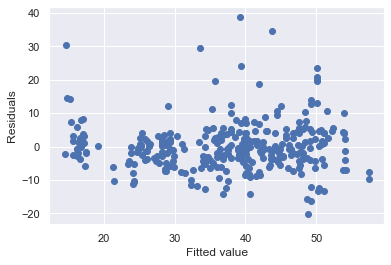

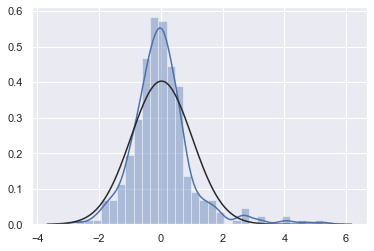

<Figure size 432x288 with 0 Axes>

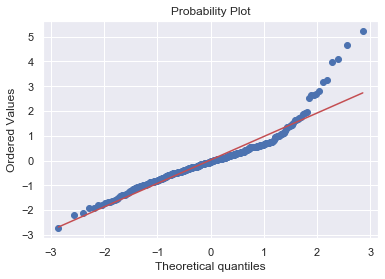

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 216.68it/s]


Acceptance rate :  0.1807
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.27  0.42  [36.436, 38.104]  36.48  36.99  37.27   
1  MRT_distance_sqrt  -6.24  0.61  [-7.452, -5.027]  -7.47  -6.65  -6.22   
2           Latitude   2.62  0.49    [1.638, 3.602]   1.66   2.28   2.62   
3          House_age  -2.91  0.40  [-3.703, -2.113]  -3.63  -3.16  -2.91   
4   Conv_store_count   2.56  0.59    [1.388, 3.736]   1.39   2.16   2.56   
5              sigma   7.60  0.30    [7.007, 8.199]   7.00   7.41   7.60   

    75.0   97.5  
0  37.55  38.10  
1  -5.81  -5.17  
2   2.95   3.57  
3  -2.66  -2.11  
4   2.97   3.67  
5   7.80   8.18  
============ Fidelity summary ==================
 the mean square error is :  57.73524362849445
 MSE test is :  53.28146287223717
 PVE is  :  0.652200105248887
 F   is  :  153.44487355456533
 p value :  1.1102230246251565e-16
 AIC is  :  2273.048968005381
 BIC is  :  2292.029256759208
 AICc is :  2273.234726519313

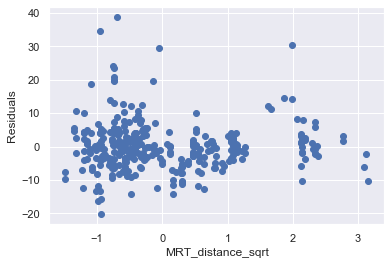

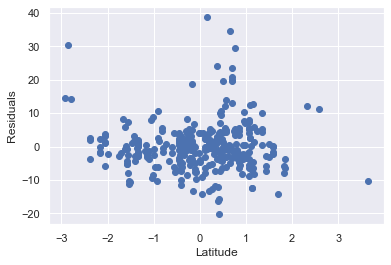

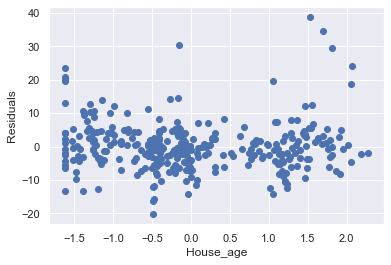

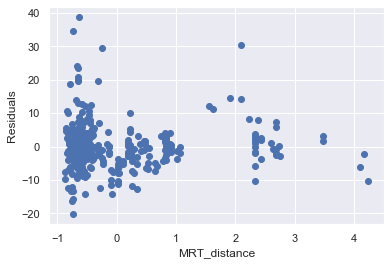

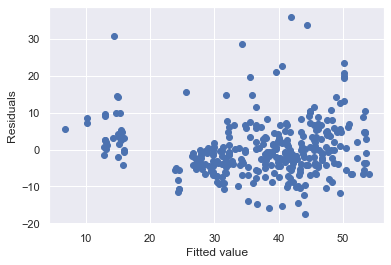

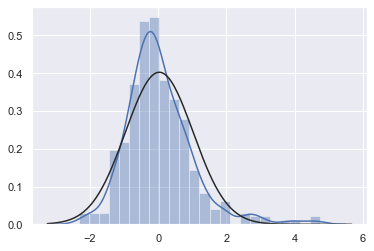

<Figure size 432x288 with 0 Axes>

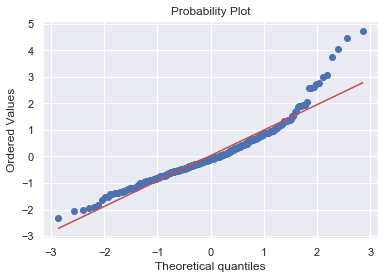

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 219.48it/s]


Acceptance rate :  0.1917
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.31  0.41   [36.497, 38.121]  36.52  37.05  37.30   
1  MRT_distance_sqrt  -8.69  0.78  [-10.249, -7.138] -10.32  -9.17  -8.71   
2           Latitude   2.85  0.52     [1.812, 3.881]   1.87   2.48   2.81   
3          House_age  -2.76  0.40   [-3.558, -1.956]  -3.53  -3.01  -2.75   
4          Longitude  -1.16  0.76    [-2.681, 0.362]  -2.82  -1.61  -1.14   
5              sigma   7.81  0.31     [7.181, 8.435]   7.23   7.59   7.80   

    75.0   97.5  
0  37.58  38.12  
1  -8.24  -7.04  
2   3.19   3.93  
3  -2.48  -1.99  
4  -0.68   0.26  
5   8.00   8.45  
============ Fidelity summary ==================
 the mean square error is :  60.785853717594094
 MSE test is :  59.46912375676487
 PVE is  :  0.6316755115522342
 F   is  :  141.15752727133358
 p value :  1.1102230246251565e-16
 AIC is  :  2289.9983370753366
 BIC is  :  2308.9786258291633
 AICc is :  2290.1

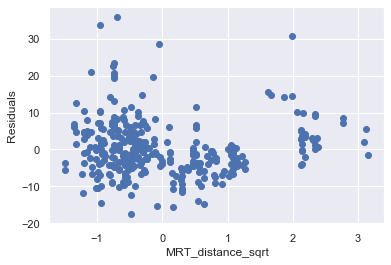

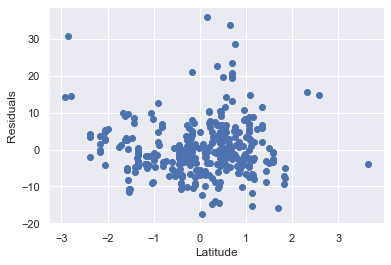

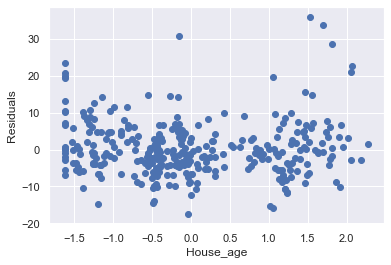

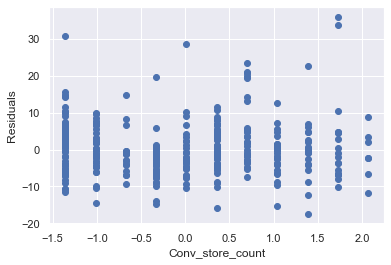

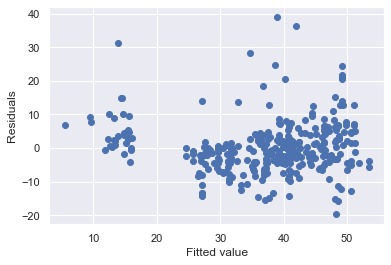

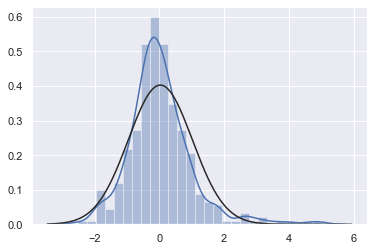

<Figure size 432x288 with 0 Axes>

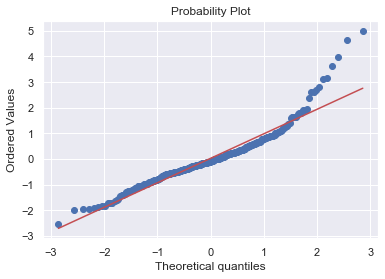

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 221.44it/s]


Acceptance rate :  0.2021
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.31  0.43  [36.453, 38.167]  36.47  37.03  37.29   
1  MRT_distance_sqrt  -6.94  0.74  [-8.414, -5.468]  -8.43  -7.44  -6.95   
2           Latitude   2.07  0.71    [0.645, 3.497]   0.53   1.65   2.12   
3          House_age  -2.92  0.42  [-3.762, -2.081]  -3.78  -3.20  -2.90   
4        dist_center  -1.54  1.06   [-3.663, 0.591]  -3.92  -2.16  -1.49   
5              sigma   7.81  0.31    [7.199, 8.425]   7.22   7.60   7.80   

    75.0   97.5  
0  37.59  38.18  
1  -6.44  -5.44  
2   2.57   3.42  
3  -2.64  -2.14  
4  -0.86   0.64  
5   8.02   8.43  
============ Fidelity summary ==================
 the mean square error is :  61.07545474019941
 MSE test is :  59.57492714688546
 PVE is  :  0.6315161719871221
 F   is  :  140.45276367076312
 p value :  1.1102230246251565e-16
 AIC is  :  2291.542286861764
 BIC is  :  2310.5225756155905
 AICc is :  2291.7280453756

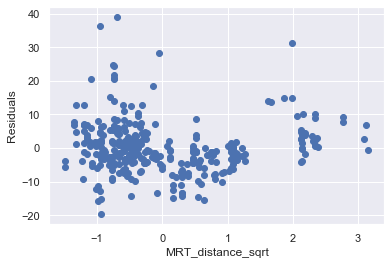

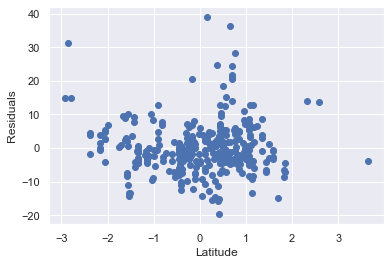

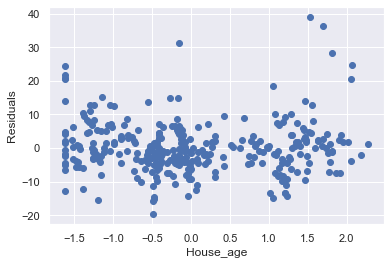

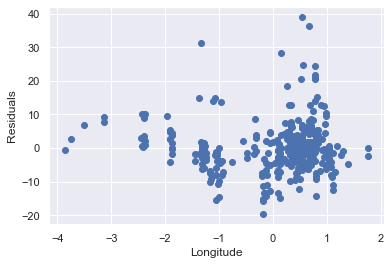

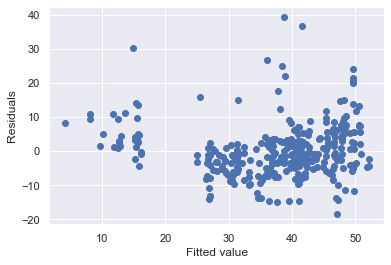

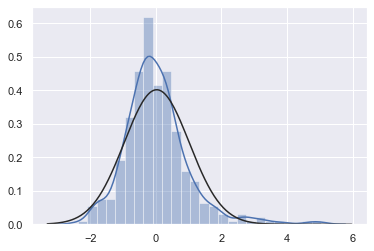

<Figure size 432x288 with 0 Axes>

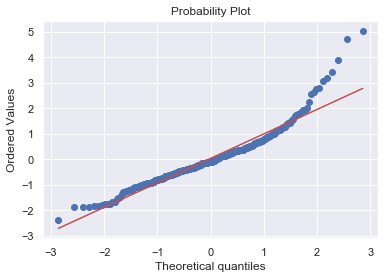

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 216.91it/s]


Acceptance rate :  0.183
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.31  0.41  [36.482, 38.134]  36.49  37.04  37.31   
1  MRT_distance_sqrt  -7.10  0.63  [-8.363, -5.845]  -8.27  -7.52  -7.11   
2           Latitude   3.04  0.51    [2.028, 4.055]   2.03   2.70   3.04   
3          House_age  -2.77  0.41  [-3.590, -1.944]  -3.54  -3.03  -2.79   
4        orientation   0.94  0.54   [-0.145, 2.029]  -0.12   0.57   0.96   
5              sigma   7.80  0.31    [7.170, 8.422]   7.25   7.58   7.78   

    75.0   97.5  
0  37.58  38.16  
1  -6.69  -5.88  
2   3.40   4.05  
3  -2.49  -1.95  
4   1.30   2.04  
5   8.00   8.44  
============ Fidelity summary ==================
 the mean square error is :  60.84146690479669
 MSE test is :  56.044297473238544
 PVE is  :  0.6334949402499964
 F   is  :  141.43470726203756
 p value :  1.1102230246251565e-16
 AIC is  :  2290.2780117705065
 BIC is  :  2309.258300524333
 AICc is :  2290.4637702844

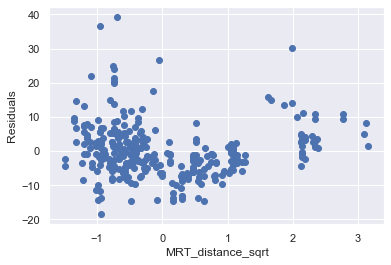

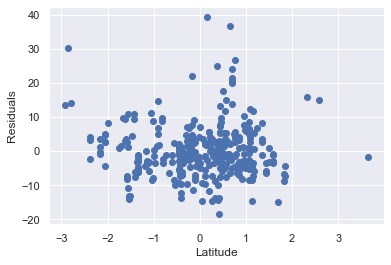

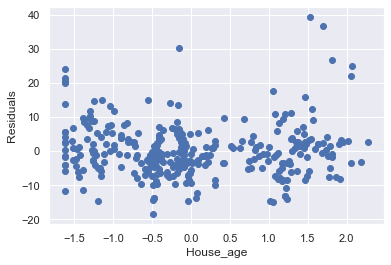

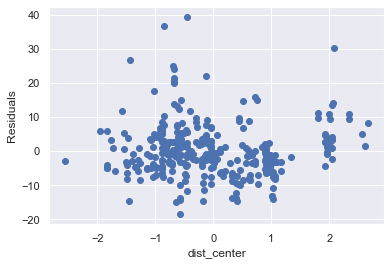

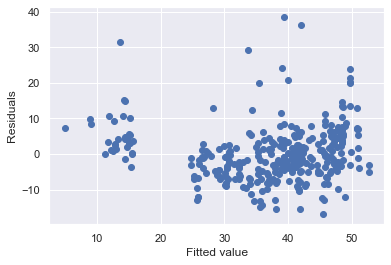

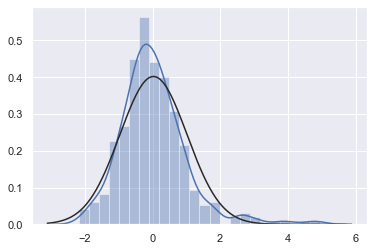

<Figure size 432x288 with 0 Axes>

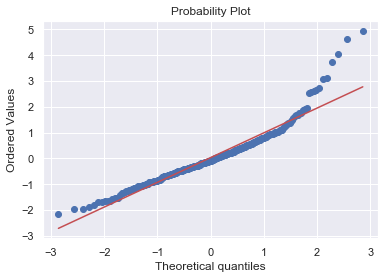

            feature        MSE       PVE           F         p_val  \
0              Date  58.514120  0.646482  150.074933  1.110223e-16   
1      MRT_distance  54.530973  0.649981  161.908557  1.110223e-16   
2  Conv_store_count  57.735244  0.652200  153.444874  1.110223e-16   
3         Longitude  60.785854  0.631676  141.157527  1.110223e-16   
4       dist_center  61.075455  0.631516  140.452764  1.110223e-16   
5       orientation  60.841467  0.633495  141.434707  1.110223e-16   

           AIC         AICc          BIC  
0  2277.454998  2296.435287  2296.435287  
1  2254.274623  2273.254911  2273.254911  
2  2273.048968  2292.029257  2292.029257  
3  2289.998337  2308.978626  2308.978626  
4  2291.542287  2310.522576  2310.522576  
5  2290.278012  2309.258301  2309.258301  


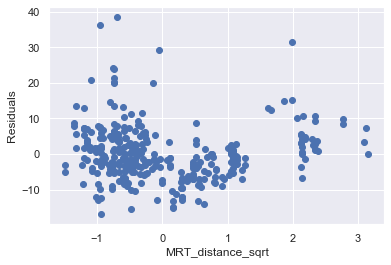

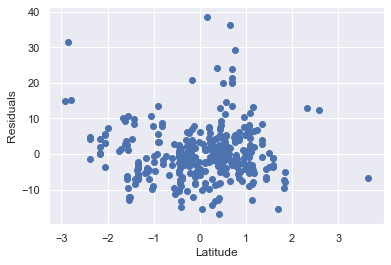

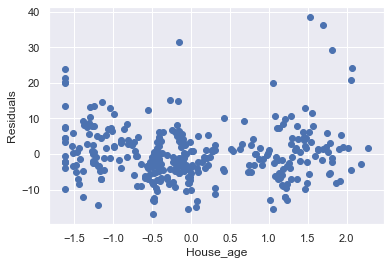

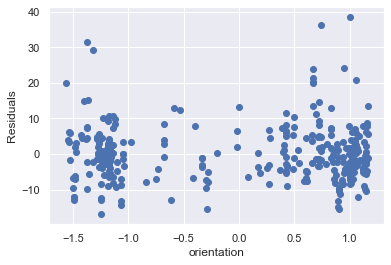

In [12]:
MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' , 'Latitude','House_age', predictor ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt', 'Latitude','House_age', predictor ,'sigma' ]
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(4,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)
   
    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.array( [10,10,10,10,10,10] )
    step_size = 0.5
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

We keep **MRT_distance_sqrt**, **Latitude**, **House_age**,**MRT_distance** and we continue to select the third best predictor

##### Fifth predictors

In [13]:
X_names = [ 'Date'  , 'Conv_store_count' , 'Longitude' , 'orientation','dist_center' ]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 223.40it/s]


Acceptance rate :  0.1328
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.35  0.39    [36.564, 38.135]  36.59  37.08  37.34   
1  MRT_distance_sqrt -16.56  1.43  [-19.418, -13.705] -19.45 -17.47 -16.55   
2          House_age  -2.73  0.37    [-3.465, -1.990]  -3.47  -2.94  -2.73   
3           Latitude   3.34  0.45      [2.433, 4.242]   2.46   3.04   3.35   
4       MRT_distance   9.07  1.42     [6.230, 11.909]   6.52   8.09   9.06   
5               Date   1.76  0.38      [0.999, 2.519]   0.93   1.53   1.78   
6              sigma   7.16  0.28      [6.607, 7.723]   6.67   6.96   7.15   

    75.0   97.5  
0  37.61  38.16  
1 -15.58 -13.92  
2  -2.49  -2.00  
3   3.63   4.23  
4  10.06  11.82  
5   2.00   2.50  
6   7.35   7.76  
============ Fidelity summary ==================
 the mean square error is :  51.48587764349157
 MSE test is :  49.09957635173412
 PVE is  :  0.6683327544493374
 F   is  :  141.06105728963806
 p value :  1

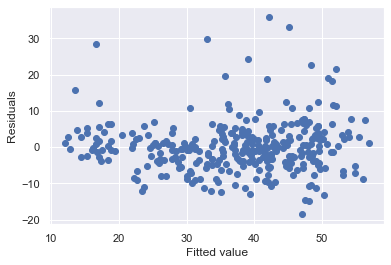

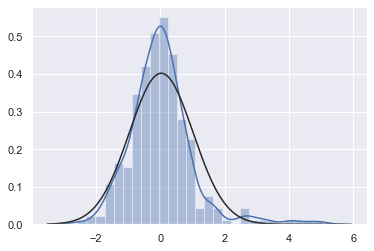

<Figure size 432x288 with 0 Axes>

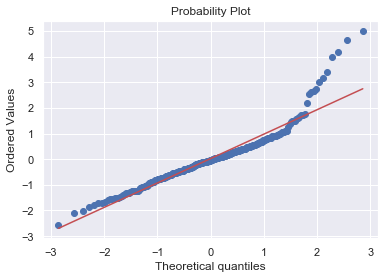

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 231.91it/s]


Acceptance rate :  0.1514
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.30  0.42    [36.470, 38.132]  36.47  37.00  37.32   
1  MRT_distance_sqrt -13.46  1.59  [-16.634, -10.280] -16.81 -14.39 -13.54   
2          House_age  -2.90  0.38    [-3.658, -2.137]  -3.68  -3.14  -2.89   
3           Latitude   3.17  0.48      [2.214, 4.119]   2.18   2.83   3.18   
4       MRT_distance   7.32  1.49     [4.344, 10.291]   3.97   6.44   7.38   
5   Conv_store_count   1.95  0.50      [0.946, 2.952]   0.94   1.64   1.93   
6              sigma   7.30  0.30      [6.710, 7.895]   6.76   7.10   7.28   

    75.0   97.5  
0  37.60  38.13  
1 -12.49 -10.07  
2  -2.65  -2.15  
3   3.52   4.03  
4   8.21  10.31  
5   2.24   2.96  
6   7.51   7.91  
============ Fidelity summary ==================
 the mean square error is :  53.35176151737995
 MSE test is :  50.29747378180856
 PVE is  :  0.6658611278489265
 F   is  :  135.62426818749324
 p value :  1

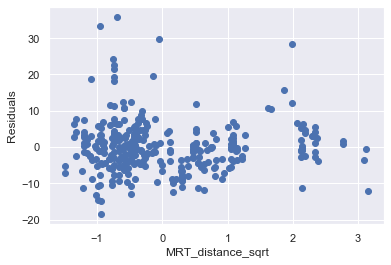

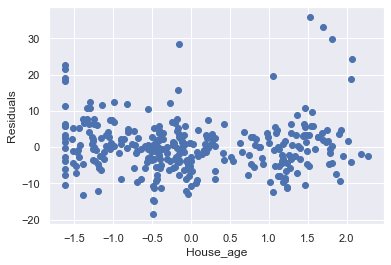

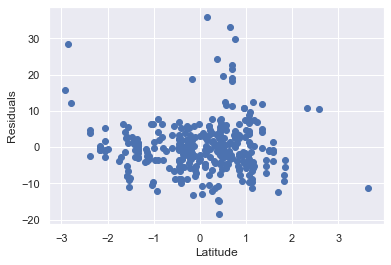

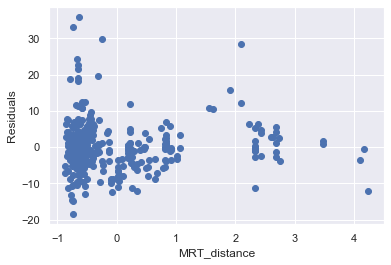

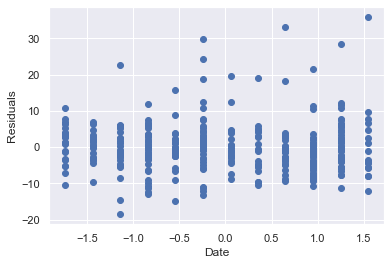

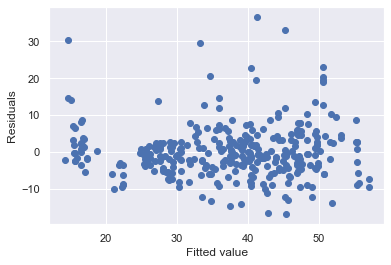

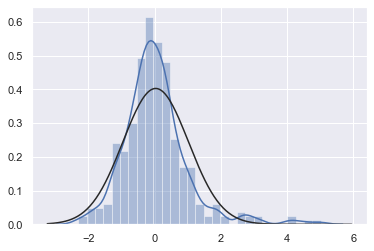

<Figure size 432x288 with 0 Axes>

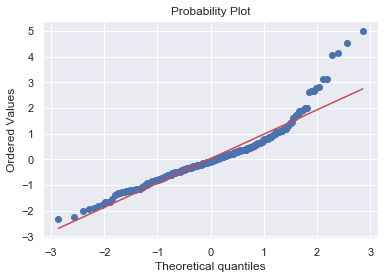

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 225.30it/s]


Acceptance rate :  0.1565
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.30  0.41    [36.475, 38.132]  36.49  37.03  37.30   
1  MRT_distance_sqrt -16.19  1.43  [-19.043, -13.329] -18.88 -17.13 -16.27   
2          House_age  -2.77  0.40    [-3.572, -1.961]  -3.60  -3.03  -2.77   
3           Latitude   3.58  0.50      [2.582, 4.576]   2.59   3.24   3.59   
4       MRT_distance   9.77  1.81     [6.152, 13.384]   6.38   8.49   9.74   
5          Longitude   0.83  0.84     [-0.844, 2.508]  -0.79   0.25   0.77   
6              sigma   7.37  0.29      [6.781, 7.961]   6.83   7.16   7.36   

    75.0   97.5  
0  37.59  38.07  
1 -15.22 -13.00  
2  -2.50  -1.99  
3   3.90   4.53  
4  11.05  13.05  
5   1.46   2.48  
6   7.57   8.00  
============ Fidelity summary ==================
 the mean square error is :  54.44404207931198
 MSE test is :  52.25577482217087
 PVE is  :  0.6510365864624437
 F   is  :  129.94439255658813
 p value :  1

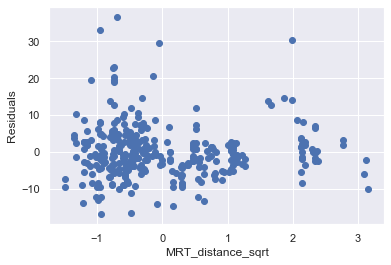

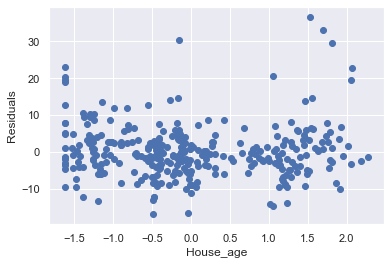

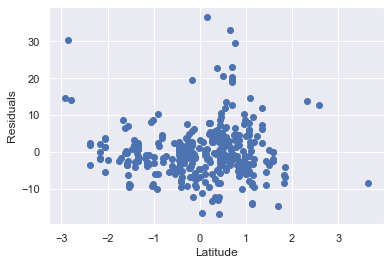

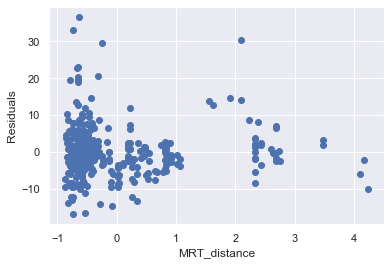

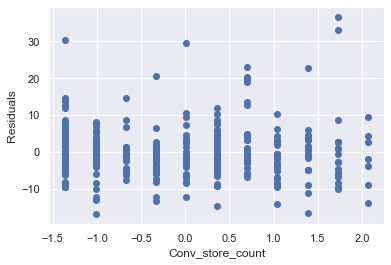

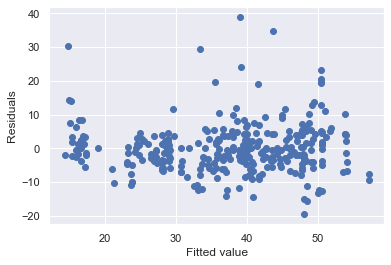

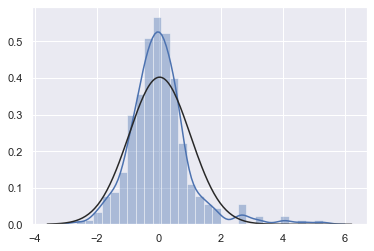

<Figure size 432x288 with 0 Axes>

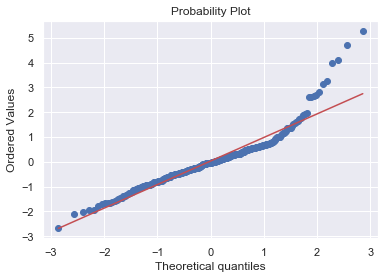

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 225.28it/s]


Acceptance rate :  0.1532
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.32  0.41    [36.489, 38.147]  36.51  37.03  37.31   
1  MRT_distance_sqrt -15.73  1.67  [-19.067, -12.383] -19.09 -16.91 -15.66   
2          House_age  -2.78  0.41    [-3.588, -1.964]  -3.59  -3.05  -2.79   
3           Latitude   3.64  0.50      [2.644, 4.644]   2.69   3.31   3.62   
4       MRT_distance   9.14  1.63     [5.876, 12.397]   6.04   7.90   9.11   
5        orientation   0.85  0.52     [-0.182, 1.891]  -0.21   0.50   0.87   
6              sigma   7.37  0.30      [6.773, 7.959]   6.82   7.17   7.35   

    75.0   97.5  
0  37.59  38.16  
1 -14.55 -12.73  
2  -2.47  -2.02  
3   3.98   4.62  
4  10.29  12.32  
5   1.21   1.85  
6   7.55   7.99  
============ Fidelity summary ==================
 the mean square error is :  54.34764285917238
 MSE test is :  50.060281854757136
 PVE is  :  0.6571510065235331
 F   is  :  131.3974610170479
 p value :  1

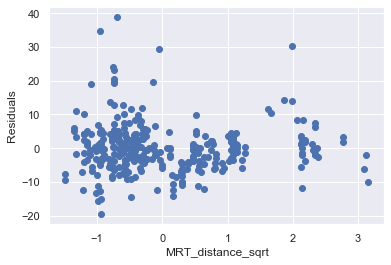

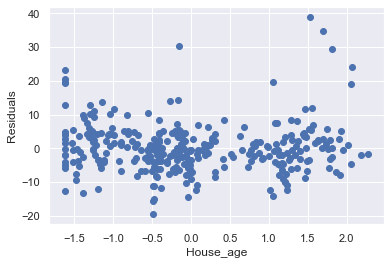

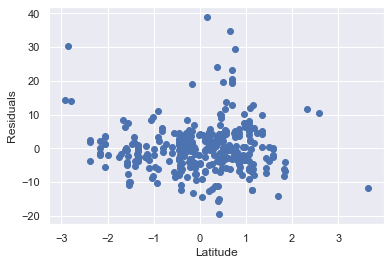

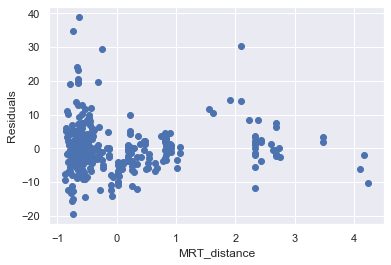

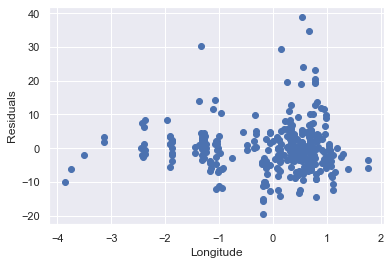

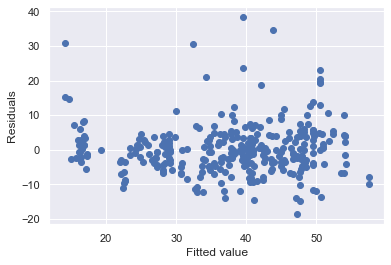

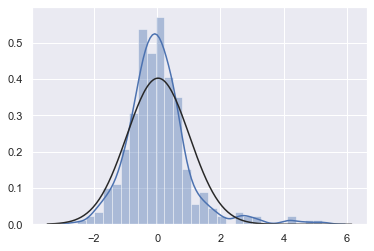

<Figure size 432x288 with 0 Axes>

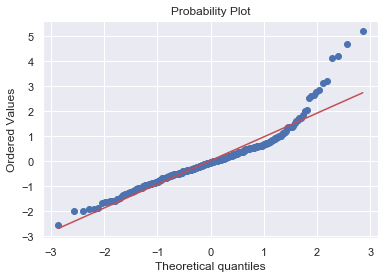

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 218.02it/s]


Acceptance rate :  0.16
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.33  0.42    [36.492, 38.170]  36.55  37.05  37.32   
1  MRT_distance_sqrt -15.23  1.35  [-17.938, -12.532] -17.79 -16.21 -15.32   
2          House_age  -3.03  0.41    [-3.852, -2.216]  -3.87  -3.31  -3.06   
3           Latitude   2.11  0.77      [0.574, 3.643]   0.63   1.57   2.12   
4       MRT_distance   9.49  1.44     [6.612, 12.361]   6.67   8.44   9.61   
5        dist_center  -2.74  1.13    [-4.995, -0.483]  -4.93  -3.55  -2.69   
6              sigma   7.32  0.30      [6.732, 7.918]   6.73   7.12   7.31   

    75.0   97.5  
0  37.62  38.14  
1 -14.25 -12.51  
2  -2.76  -2.20  
3   2.63   3.60  
4  10.58  12.06  
5  -1.90  -0.65  
6   7.52   7.94  
============ Fidelity summary ==================
 the mean square error is :  53.66111730701147
 MSE test is :  54.06549347593317
 PVE is  :  0.660357327606607
 F   is  :  133.72783052239237
 p value :  1.11

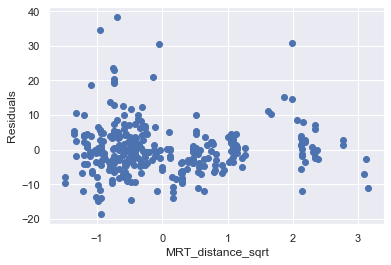

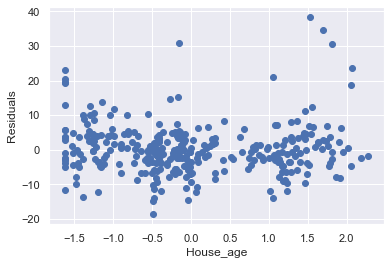

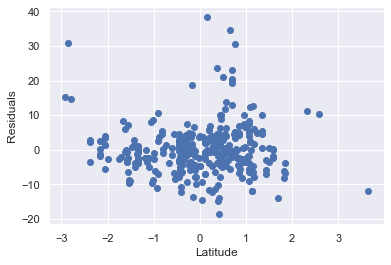

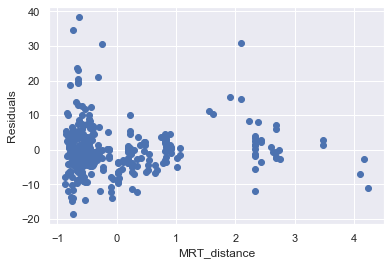

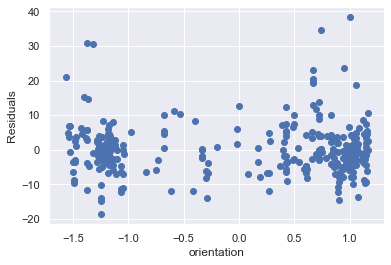

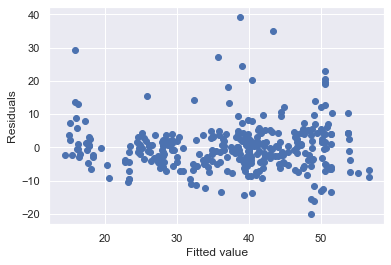

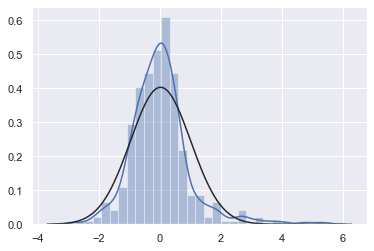

<Figure size 432x288 with 0 Axes>

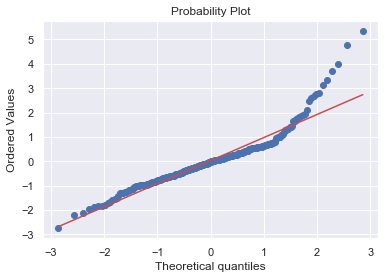

            feature        MSE       PVE           F         p_val  \
0              Date  51.485878  0.668333  141.061057  1.110223e-16   
1  Conv_store_count  53.351762  0.665861  135.624268  1.110223e-16   
2         Longitude  54.444042  0.651037  129.944393  1.110223e-16   
3       orientation  54.347643  0.657151  131.397461  1.110223e-16   
4       dist_center  53.661117  0.660357  133.727831  1.110223e-16   

           AIC         AICc          BIC  
0  2236.335485  2259.111831  2259.111831  
1  2248.061073  2270.837420  2270.837420  
2  2254.719498  2277.495845  2277.495845  
3  2254.139301  2276.915647  2276.915647  
4  2249.965328  2272.741674  2272.741674  


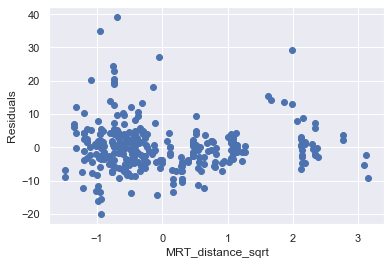

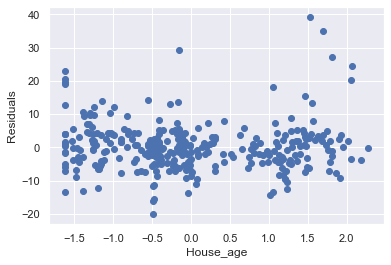

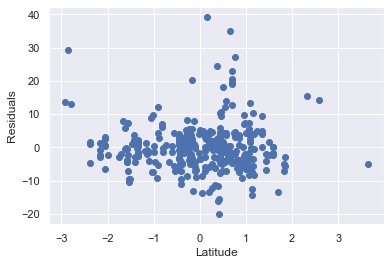

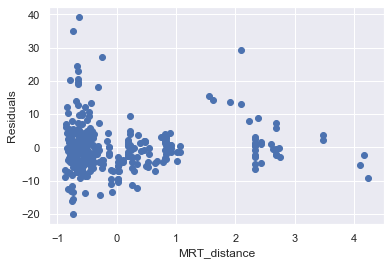

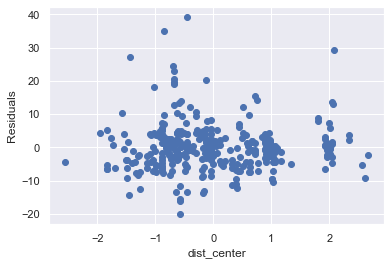

In [14]:
MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' ,'House_age','Latitude','MRT_distance' , predictor  ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt','House_age','Latitude','MRT_distance' , predictor ,'sigma' ]
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(5,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)
   
    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.array( [10,10,10,10,10,10,10] )
    step_size = 0.5
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 224.14it/s]


Acceptance rate :  0.2991
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.26  0.39    [36.481, 38.040]  36.49  37.01  37.25   
1  MRT_distance_sqrt -14.18  1.44  [-17.053, -11.301] -16.91 -15.13 -14.26   
2          House_age  -2.86  0.40    [-3.671, -2.057]  -3.67  -3.14  -2.87   
3           Latitude   2.99  0.48      [2.024, 3.949]   2.03   2.70   2.99   
4       MRT_distance   7.60  1.30     [4.994, 10.211]   4.82   6.79   7.64   
5               Date   1.66  0.38      [0.904, 2.424]   0.94   1.40   1.66   
6   Conv_store_count   1.78  0.52      [0.738, 2.813]   0.75   1.41   1.77   
7              sigma   7.11  0.28      [6.542, 7.674]   6.60   6.91   7.10   

    75.0   97.5  
0  37.51  38.03  
1 -13.37 -11.04  
2  -2.59  -2.11  
3   3.28   3.96  
4   8.49  10.12  
5   1.92   2.42  
6   2.13   2.77  
7   7.29   7.70  
============ Fidelity summary ==================
 the mean square error is :  50.685061882475665
 MSE test is

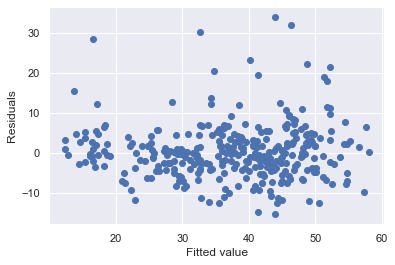

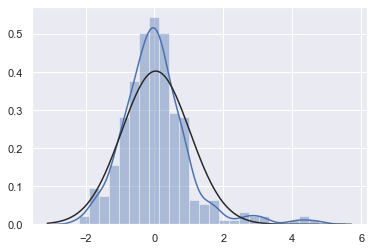

<Figure size 432x288 with 0 Axes>

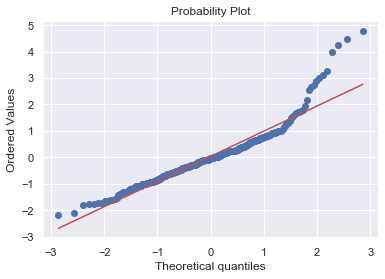

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 228.92it/s]


Acceptance rate :  0.3058
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.28  0.38    [36.520, 38.034]  36.54  37.01  37.28   
1  MRT_distance_sqrt -16.18  1.42  [-19.013, -13.338] -19.00 -17.19 -16.08   
2          House_age  -2.75  0.39    [-3.537, -1.966]  -3.50  -3.02  -2.75   
3           Latitude   3.30  0.46      [2.389, 4.214]   2.47   2.98   3.29   
4       MRT_distance   9.31  1.53     [6.253, 12.376]   6.23   8.37   9.28   
5               Date   1.78  0.38      [1.022, 2.544]   1.02   1.52   1.79   
6          Longitude   0.79  0.74     [-0.690, 2.273]  -0.80   0.33   0.83   
7              sigma   7.17  0.28      [6.603, 7.742]   6.63   6.97   7.17   

    75.0   97.5  
0  37.53  38.02  
1 -15.14 -13.56  
2  -2.49  -1.99  
3   3.59   4.28  
4  10.38  12.34  
5   2.03   2.52  
6   1.31   2.13  
7   7.37   7.74  
============ Fidelity summary ==================
 the mean square error is :  51.59541807645207
 MSE test is 

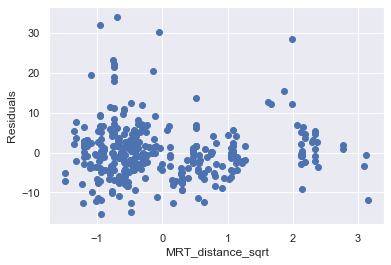

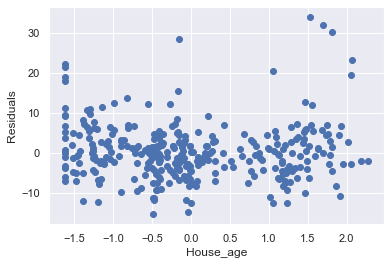

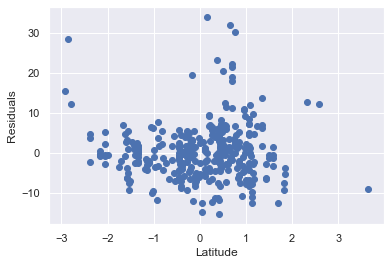

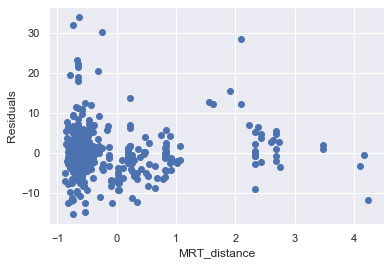

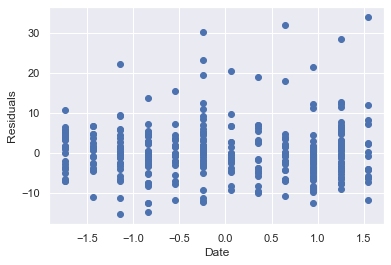

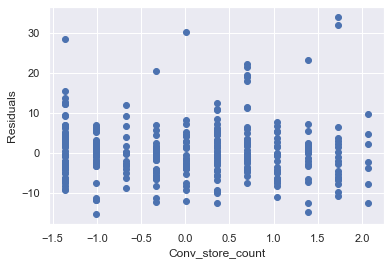

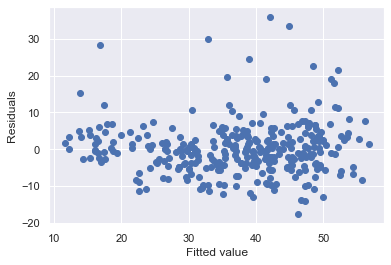

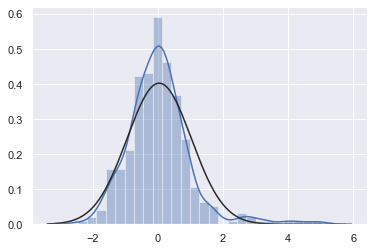

<Figure size 432x288 with 0 Axes>

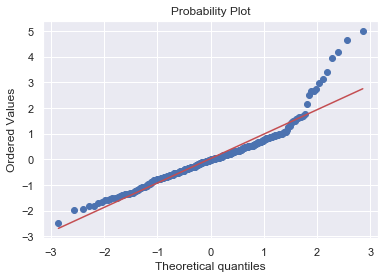

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 226.62it/s]


Acceptance rate :  0.2966
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.26  0.37    [36.515, 38.008]  36.50  37.01  37.27   
1  MRT_distance_sqrt -15.29  1.28  [-17.852, -12.723] -18.03 -16.00 -15.23   
2          House_age  -2.77  0.40    [-3.558, -1.973]  -3.58  -3.03  -2.76   
3           Latitude   3.33  0.47      [2.392, 4.258]   2.32   3.03   3.34   
4       MRT_distance   8.20  1.20     [5.789, 10.605]   5.98   7.46   8.20   
5               Date   1.73  0.39      [0.946, 2.514]   0.97   1.47   1.74   
6        orientation   0.70  0.48     [-0.269, 1.665]  -0.27   0.39   0.70   
7              sigma   7.17  0.28      [6.610, 7.730]   6.65   6.97   7.16   

    75.0   97.5  
0  37.51  37.97  
1 -14.49 -13.09  
2  -2.49  -2.02  
3   3.64   4.22  
4   8.91  10.58  
5   2.00   2.45  
6   1.03   1.62  
7   7.36   7.72  
============ Fidelity summary ==================
 the mean square error is :  51.79058115588301
 MSE test is 

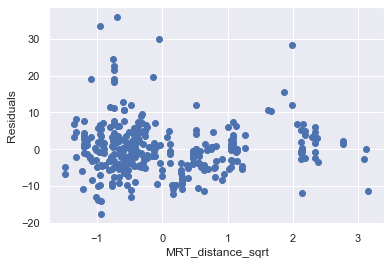

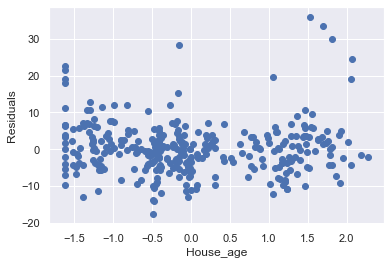

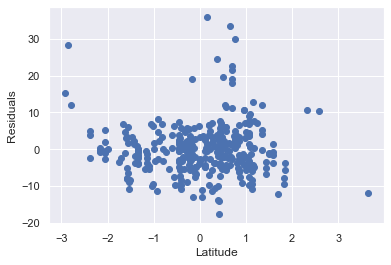

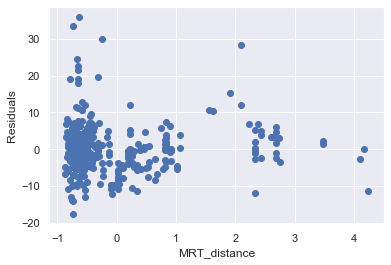

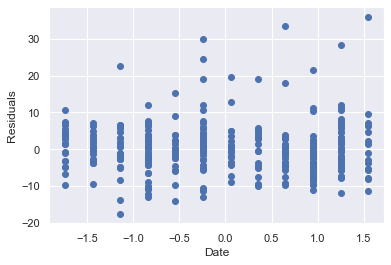

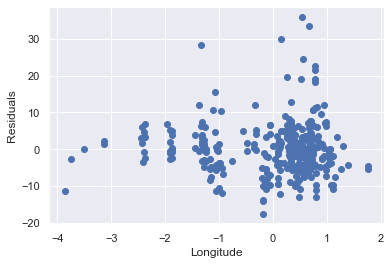

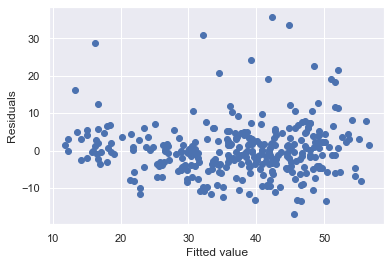

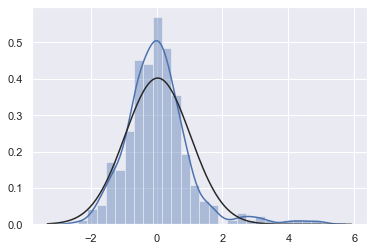

<Figure size 432x288 with 0 Axes>

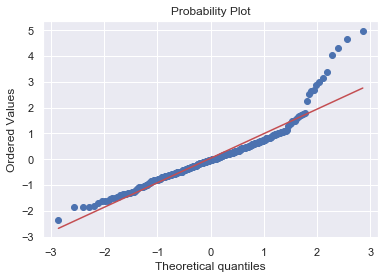

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:07<00:00, 148.05it/s]


Acceptance rate :  0.3027
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.26  0.39    [36.473, 38.038]  36.48  36.99  37.27   
1  MRT_distance_sqrt -15.23  1.31  [-17.852, -12.599] -17.54 -16.17 -15.39   
2          House_age  -3.06  0.40    [-3.856, -2.255]  -3.83  -3.33  -3.06   
3           Latitude   1.70  0.66      [0.389, 3.014]   0.42   1.23   1.70   
4       MRT_distance   9.17  1.33     [6.506, 11.844]   6.44   8.37   9.19   
5               Date   1.80  0.40      [1.005, 2.599]   1.01   1.53   1.81   
6        dist_center  -2.91  0.91    [-4.733, -1.086]  -4.79  -3.55  -2.86   
7              sigma   7.10  0.28      [6.532, 7.661]   6.59   6.90   7.07   

    75.0   97.5  
0  37.53  38.01  
1 -14.27 -12.61  
2  -2.78  -2.30  
3   2.17   2.92  
4  10.03  11.77  
5   2.08   2.55  
6  -2.24  -1.25  
7   7.29   7.69  
============ Fidelity summary ==================
 the mean square error is :  50.679186867872154
 MSE test is

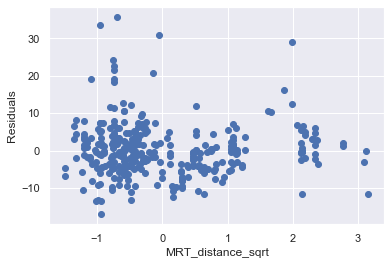

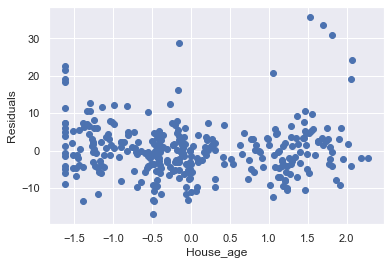

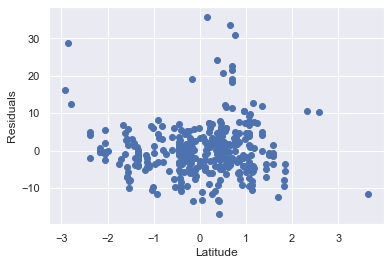

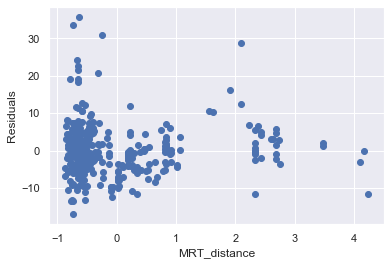

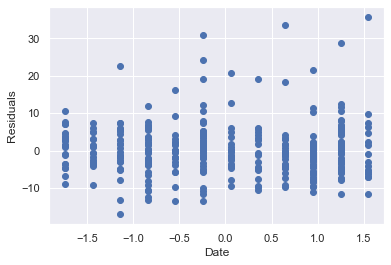

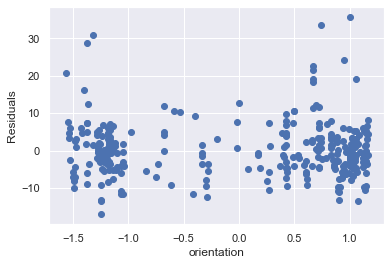

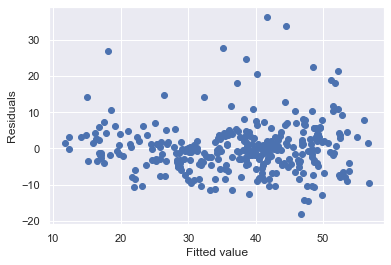

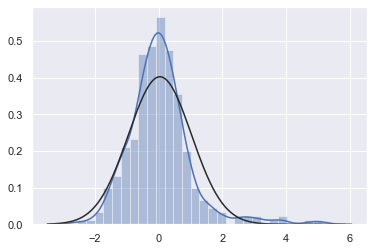

<Figure size 432x288 with 0 Axes>

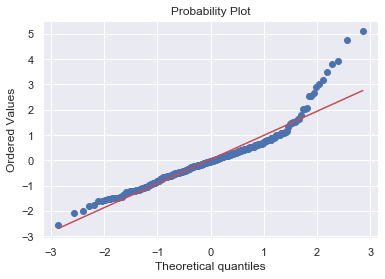

            feature        MSE       PVE           F         p_val  \
0  Conv_store_count  50.685062  0.680879  121.649798  1.110223e-16   
1         Longitude  51.595418  0.665133  116.739755  1.110223e-16   
2       orientation  51.790581  0.664491  116.187560  1.110223e-16   
3       dist_center  50.679187  0.670243  119.763395  1.110223e-16   

           AIC         AICc          BIC  
0  2232.174137  2258.746541  2258.746541  
1  2238.031843  2264.604248  2264.604248  
2  2239.249857  2265.822261  2265.822261  
3  2232.118410  2258.690815  2258.690815  


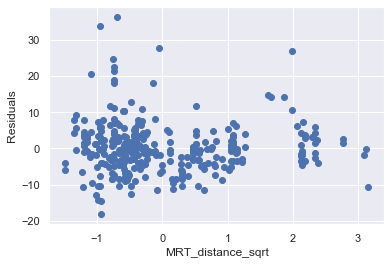

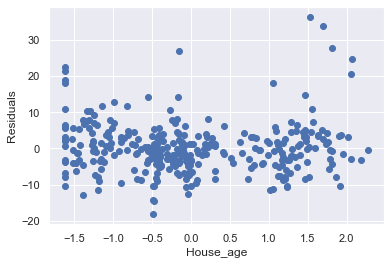

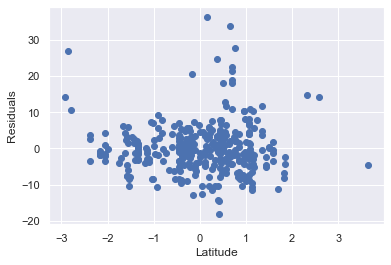

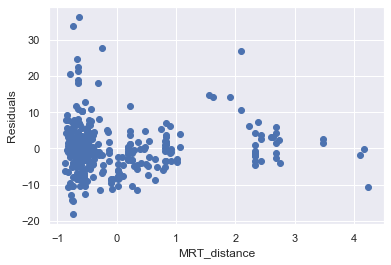

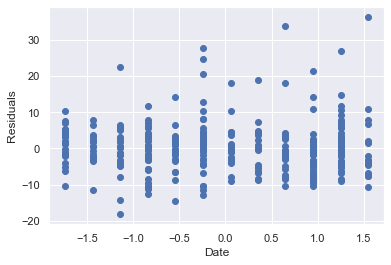

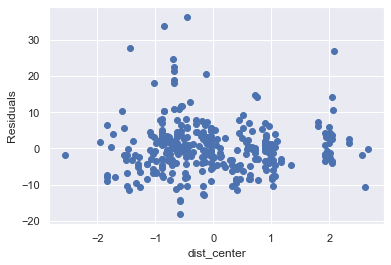

In [18]:
X_names = [  'Conv_store_count' , 'Longitude' , 'orientation','dist_center' ]

MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' ,'House_age','Latitude','MRT_distance' ,'Date'  , predictor  ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt','House_age','Latitude','MRT_distance' ,'Date'  , predictor ,'sigma' ]
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(6,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)
   
    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.zeros(8)
    init[0]= 30
    init[-1] = 10
    step_size = 0.3
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:15<00:00, 73.53it/s]


Acceptance rate :  0.2833
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.21  0.39    [36.430, 37.986]  36.42  36.95  37.22   
1  MRT_distance_sqrt -13.67  1.48  [-16.635, -10.708] -16.20 -14.67 -13.80   
2          House_age  -2.86  0.40    [-3.651, -2.062]  -3.62  -3.12  -2.86   
3           Latitude   3.02  0.47      [2.089, 3.950]   2.13   2.70   3.01   
4       MRT_distance   7.48  1.49     [4.490, 10.467]   4.47   6.50   7.55   
5               Date   1.65  0.42      [0.819, 2.490]   0.86   1.38   1.65   
6   Conv_store_count   1.72  0.53      [0.665, 2.779]   0.64   1.37   1.71   
7          Longitude   0.52  0.69     [-0.854, 1.890]  -0.88   0.06   0.54   
8              sigma   7.11  0.27      [6.564, 7.652]   6.59   6.92   7.10   

    75.0   97.5  
0  37.47  37.95  
1 -12.91 -10.35  
2  -2.58  -2.11  
3   3.35   3.95  
4   8.49  10.43  
5   1.93   2.49  
6   2.08   2.77  
7   0.97   1.89  
8   7.29   7.67  
============ 

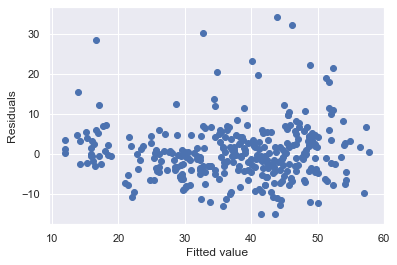

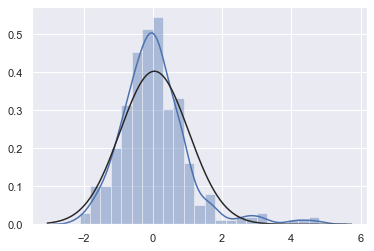

<Figure size 432x288 with 0 Axes>

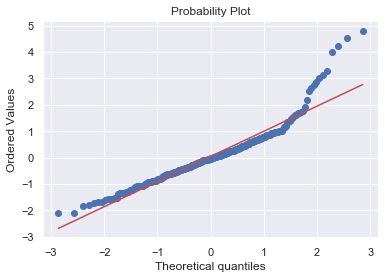

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:13<00:00, 74.76it/s]


Acceptance rate :  0.2723
            features  Coeff   std                  CI    2.5   25.0   50.0  \
0          intercept  37.19  0.40    [36.395, 37.987]  36.36  36.92  37.19   
1  MRT_distance_sqrt -13.60  1.55  [-16.691, -10.505] -15.82 -14.72 -13.86   
2          House_age  -2.87  0.37    [-3.617, -2.131]  -3.60  -3.13  -2.88   
3           Latitude   3.08  0.49      [2.106, 4.053]   2.08   2.75   3.11   
4       MRT_distance   7.06  1.49     [4.076, 10.038]   2.64   6.35   7.31   
5               Date   1.65  0.41      [0.826, 2.480]   0.80   1.39   1.65   
6   Conv_store_count   1.63  0.58      [0.469, 2.785]   0.57   1.21   1.62   
7        orientation   0.14  0.51     [-0.886, 1.160]  -0.89  -0.20   0.14   
8              sigma   7.13  0.29      [6.555, 7.711]   6.60   6.94   7.12   

    75.0   97.5  
0  37.46  38.01  
1 -12.73  -9.08  
2  -2.62  -2.14  
3   3.42   4.01  
4   8.07   9.21  
5   1.92   2.49  
6   2.00   2.80  
7   0.47   1.12  
8   7.32   7.73  
============ 

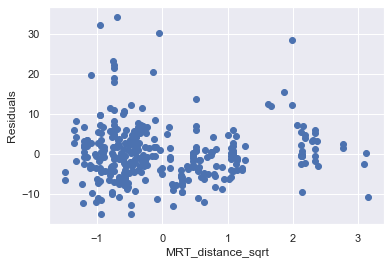

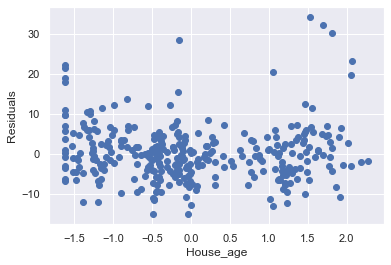

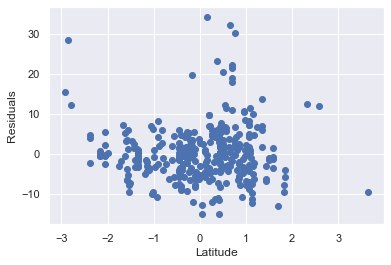

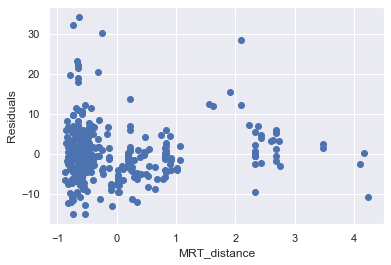

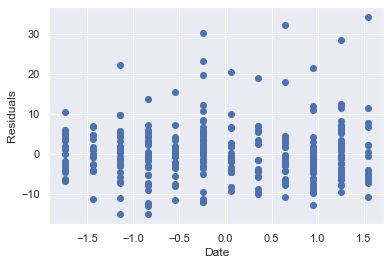

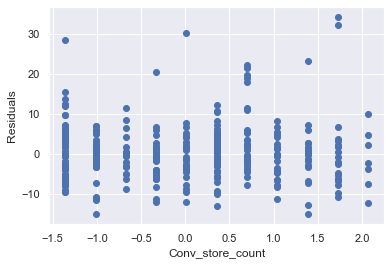

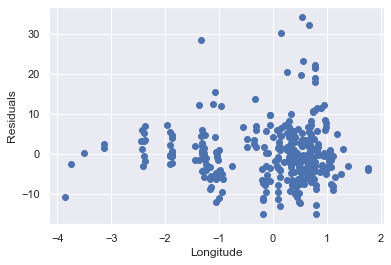

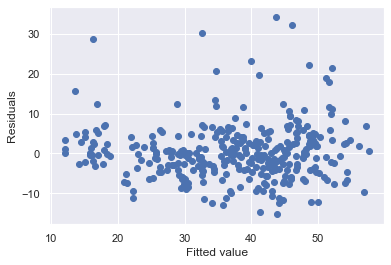

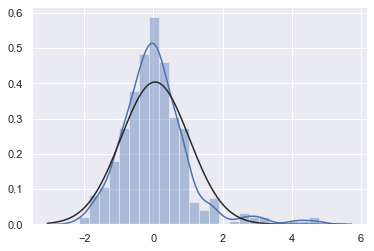

<Figure size 432x288 with 0 Axes>

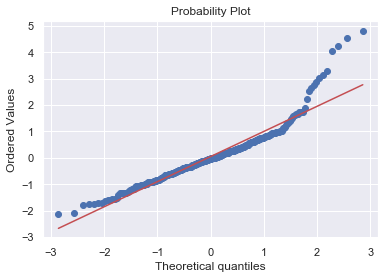

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:13<00:00, 74.84it/s]


Acceptance rate :  0.2783
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.21  0.40   [36.421, 38.007]  36.37  36.95  37.24   
1  MRT_distance_sqrt -13.18  1.60  [-16.372, -9.979] -16.71 -14.21 -13.18   
2          House_age  -3.10  0.38   [-3.857, -2.336]  -3.83  -3.35  -3.11   
3           Latitude   1.69  0.70     [0.288, 3.092]   0.21   1.23   1.73   
4       MRT_distance   7.75  1.55    [4.654, 10.845]   5.01   6.54   7.78   
5               Date   1.68  0.42     [0.839, 2.522]   0.80   1.43   1.68   
6   Conv_store_count   1.56  0.51     [0.545, 2.583]   0.57   1.23   1.57   
7        dist_center  -2.52  0.96   [-4.446, -0.593]  -4.63  -3.12  -2.48   
8              sigma   7.07  0.28     [6.510, 7.622]   6.58   6.87   7.05   

    75.0   97.5  
0  37.48  37.95  
1 -12.01 -10.27  
2  -2.83  -2.36  
3   2.19   2.93  
4   8.76  11.08  
5   1.95   2.49  
6   1.90   2.59  
7  -1.87  -0.68  
8   7.24   7.65  
============ Fidelity s

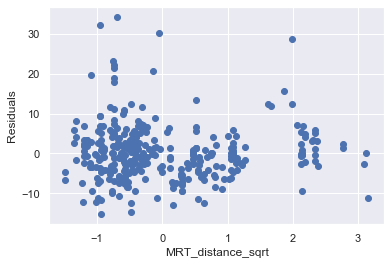

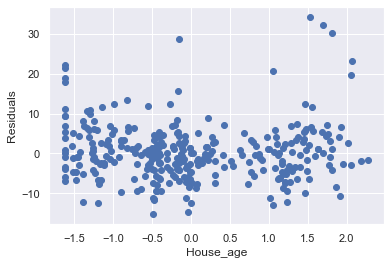

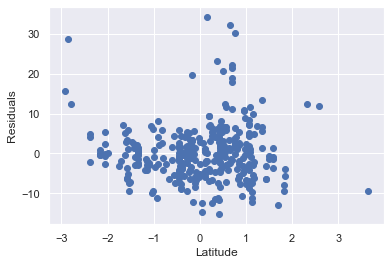

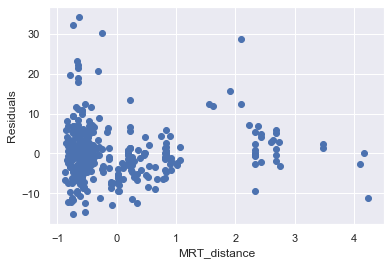

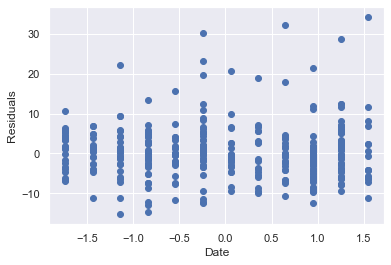

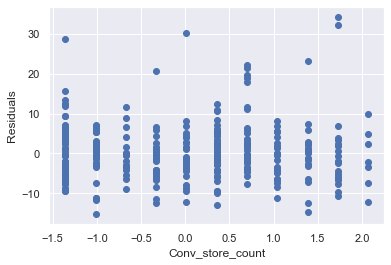

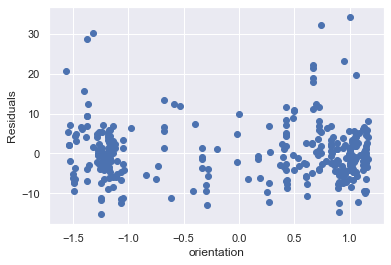

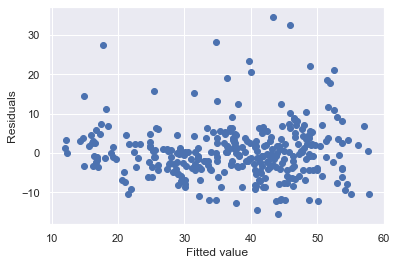

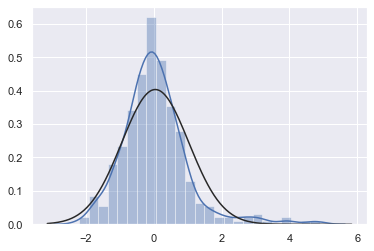

<Figure size 432x288 with 0 Axes>

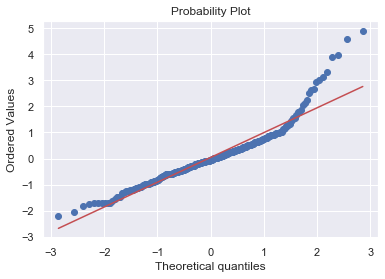

       feature        MSE       PVE           F         p_val          AIC  \
0    Longitude  50.869317  0.679189  103.635653  1.110223e-16  2234.340894   
1  orientation  51.056164  0.677683  103.027403  1.110223e-16  2235.568342   
2  dist_center  50.136795  0.684071  105.905683  1.110223e-16  2229.584984   

          AICc          BIC  
0  2264.709356  2264.709356  
1  2265.936804  2265.936804  
2  2259.953446  2259.953446  


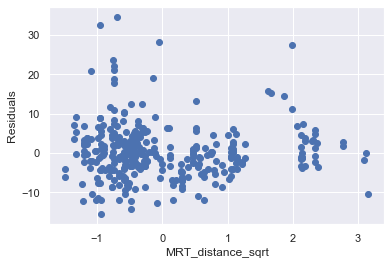

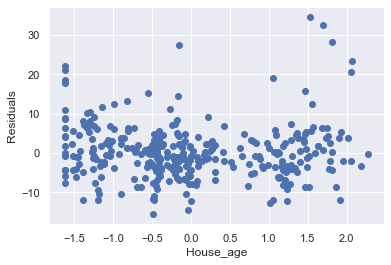

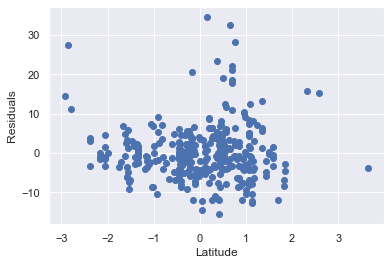

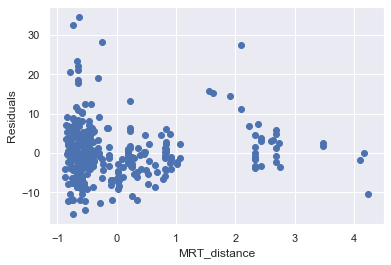

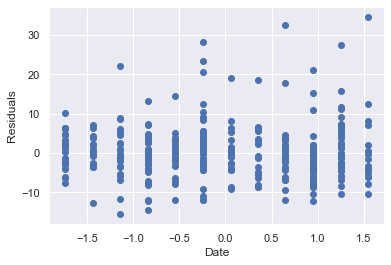

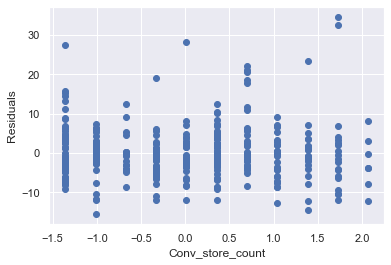

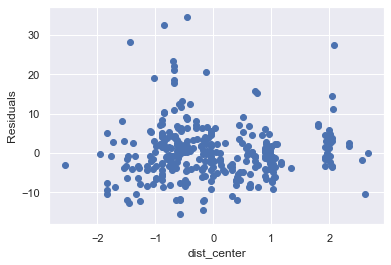

In [21]:
X_names = [ 'Longitude' , 'orientation','dist_center' ]

MSE = []
PVE = []
F = []
P_val = []
AIC = []
AICc = []
BIC = []

for predictor in X_names :
    predictors = [ 'MRT_distance_sqrt' ,'House_age','Latitude','MRT_distance' ,'Date'  ,'Conv_store_count' , predictor  ]
    Parameter = [ 'intercept' ,'MRT_distance_sqrt','House_age','Latitude','MRT_distance' ,'Date'  ,'Conv_store_count' , predictor ,'sigma' ]
    X = (data_no_outlier[predictors].dropna()).to_numpy()
    Model = Bayesian_framework(7,Parameter,X,Y)
    proba_set = Gaussian_model_np(Model)
   
    # Define the model
    Model.set_log_joint_prior(proba_set.log_joint_prior)
    Model.set_log_likelihood(proba_set.log_likelihood)
    
    # define a sample algorithm :
    init = np.zeros(9)
    init[0]= 30
    init[-1] = 10
    step_size = 0.3
    num_samples = 10000

    M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

    M_H.compute_statistic()
    
    # We see that we can select a burn in that around 200
    burn_in = 500

    M_H.compute_statistic(burn_in)
    M_H.summary()
    tool = Vizualisation_tool(Model,M_H)
    tool.fidelity()
    tool.diagnostics()
    
    
    F_ , p_value = tool.F_test()
    
    MSE.append(tool.MSE())
    PVE.append(tool.PVE())
    F.append(F_)
    P_val.append(p_value)
    AIC.append(tool.AIC())
    BIC.append(tool.BIC())
    AICc.append(tool.BIC())
    
table = pd.DataFrame()
table["feature"] = X_names
table["MSE"] = MSE
table["PVE"] = PVE 
table["F"] = F
table["p_val"] = P_val
table["AIC"] = AIC
table["AICc"] = AICc
table["BIC"] = BIC
print(table)

### Final model 

Presentation of the final model that was selected 

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:13<00:00, 75.16it/s]


Acceptance rate :  0.2905
            features  Coeff   std                 CI    2.5   25.0   50.0  \
0          intercept  37.27  0.36   [36.541, 37.994]  36.52  37.03  37.27   
1  MRT_distance_sqrt -14.00  2.02  [-18.040, -9.963] -17.07 -15.38 -14.38   
2          House_age  -2.89  0.38   [-3.644, -2.137]  -3.61  -3.14  -2.90   
3           Latitude   3.03  0.49     [2.052, 4.001]   2.09   2.70   3.03   
4               Date   1.64  0.38     [0.885, 2.397]   0.88   1.39   1.64   
5   Conv_store_count   1.77  0.61     [0.549, 2.996]   0.66   1.36   1.73   
6       MRT_distance   7.47  1.89    [3.698, 11.244]   3.66   6.52   7.70   
7              sigma   7.13  0.30     [6.534, 7.717]   6.58   6.92   7.12   

    75.0   97.5  
0  37.52  37.95  
1 -12.87  -9.60  
2  -2.64  -2.13  
3   3.36   3.96  
4   1.89   2.38  
5   2.17   3.03  
6   8.76  10.52  
7   7.31   7.74  


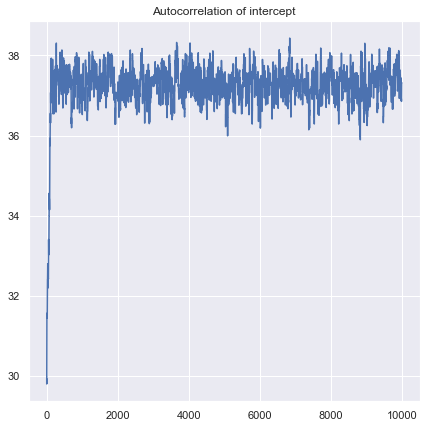

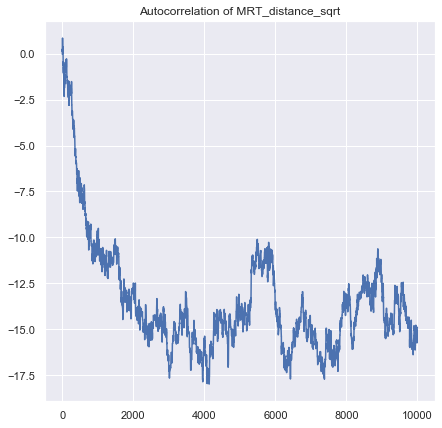

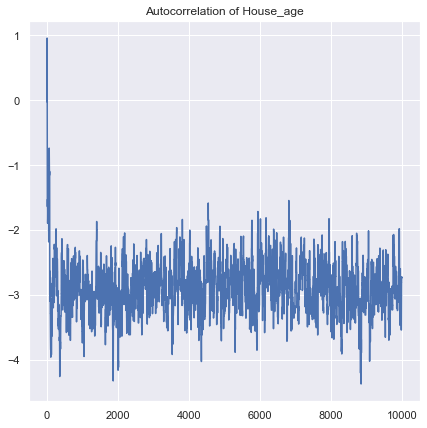

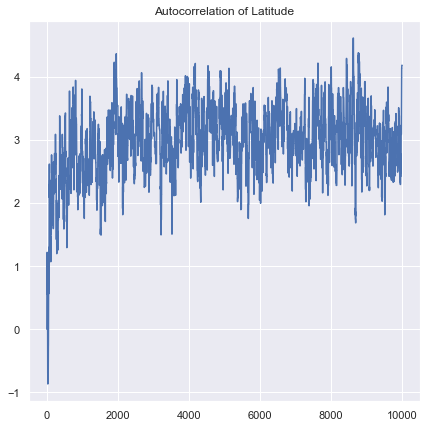

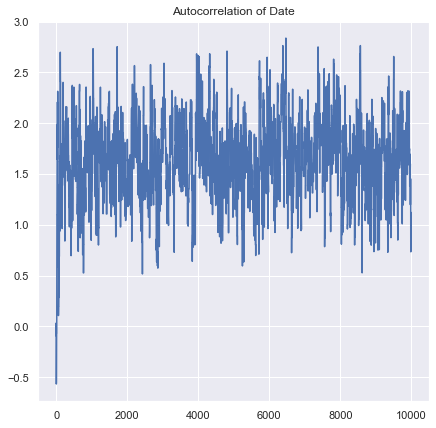

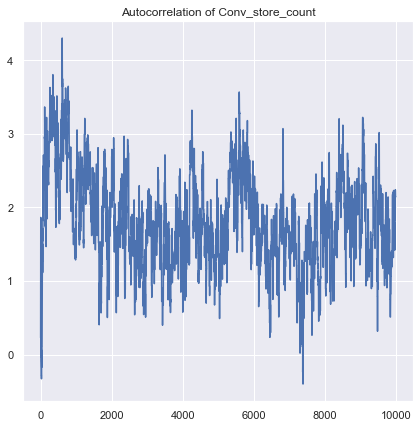

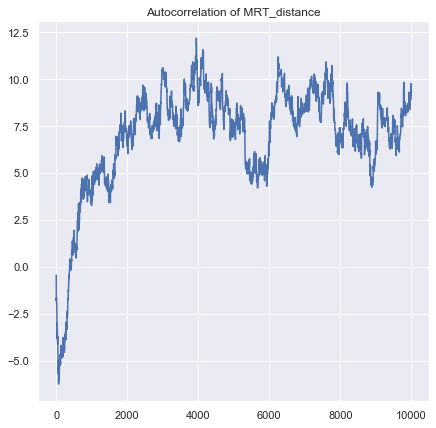

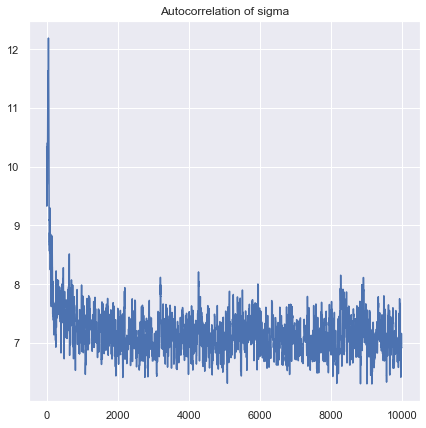

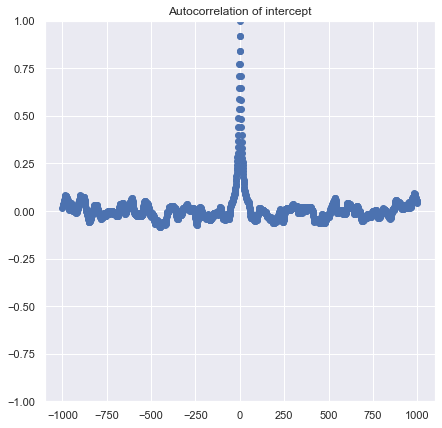

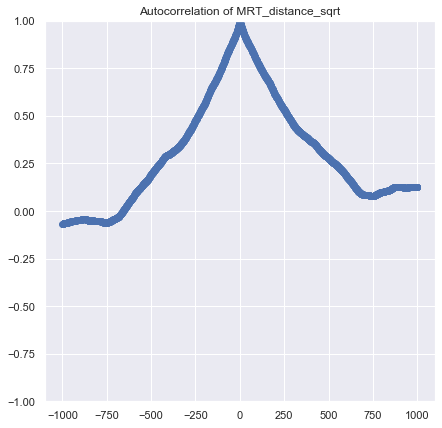

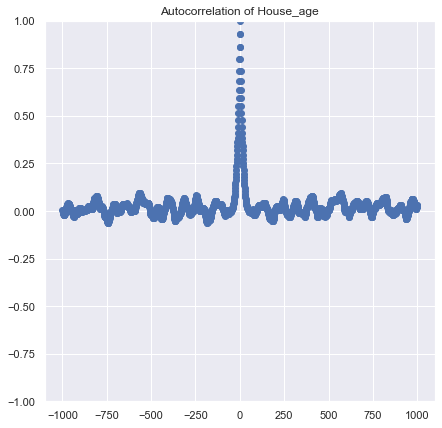

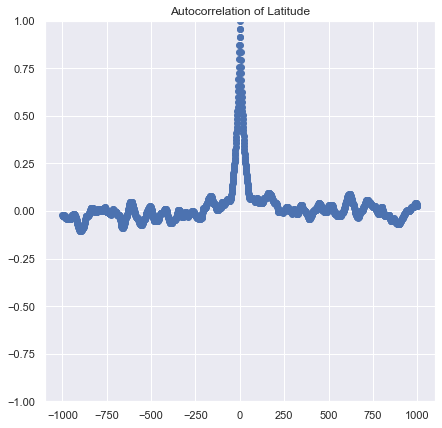

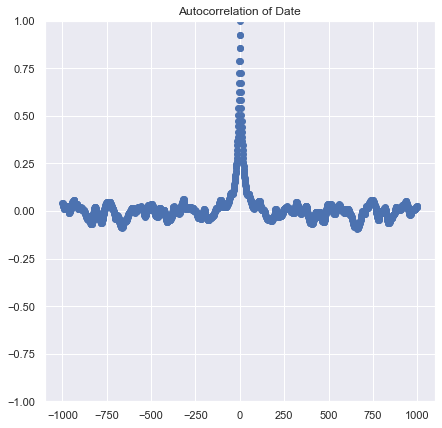

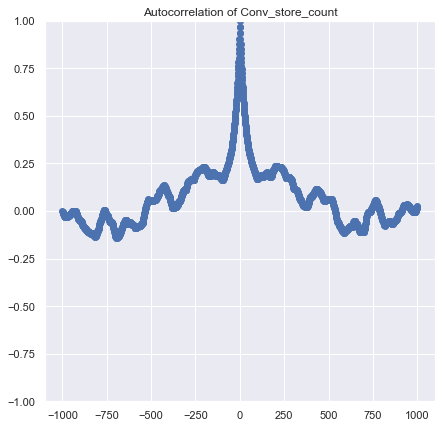

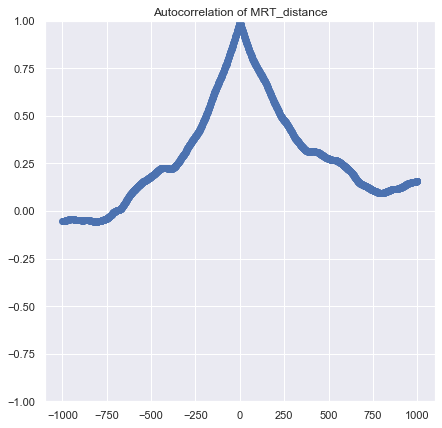

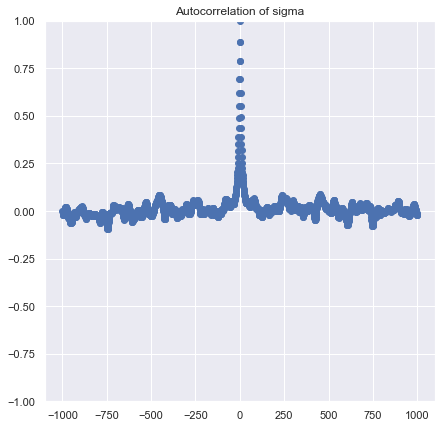

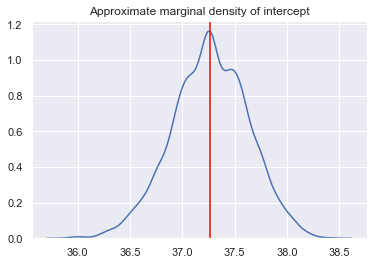

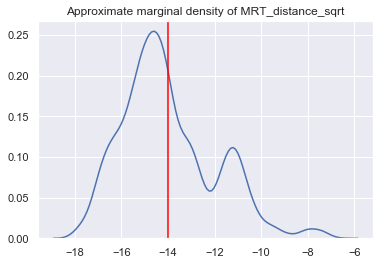

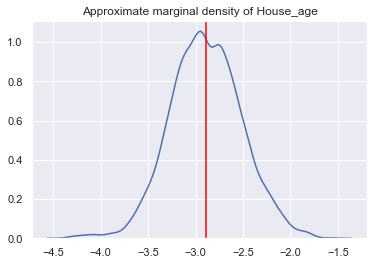

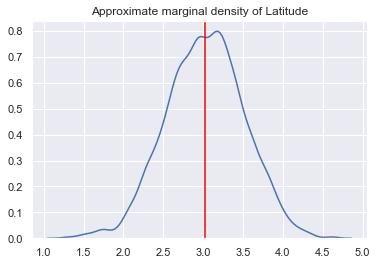

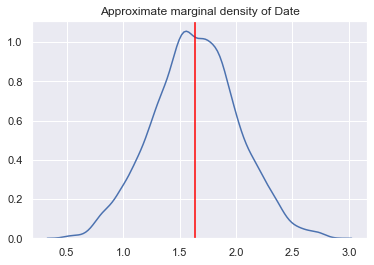

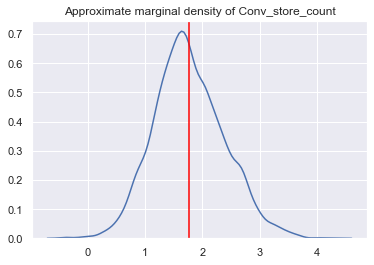

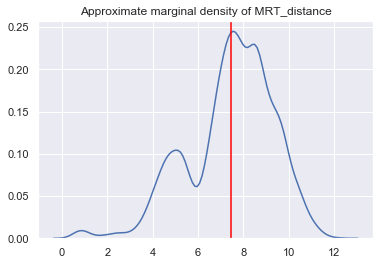

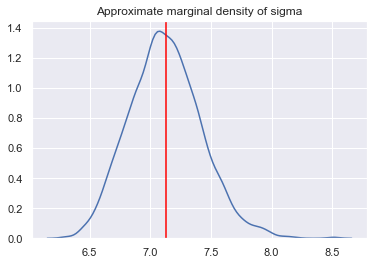

============ Fidelity summary ==================
 the mean square error is :  50.72348041105587
 MSE test is :  47.43571771653793
 PVE is  :  0.6787805182853034
 F   is  :  121.18296849212362
 p value :  1.1102230246251565e-16
 AIC is  :  2232.4502721062863
 BIC is  :  2259.022676361644
 AICc is :  2232.799181763607


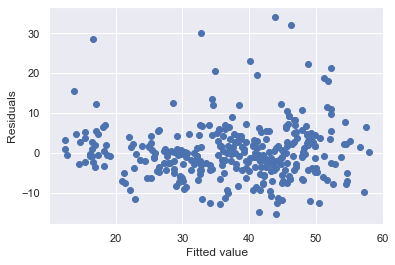

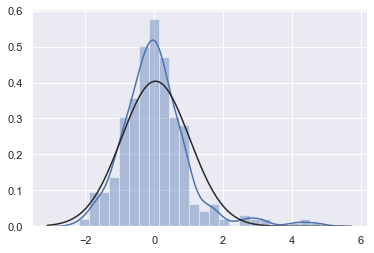

<Figure size 432x288 with 0 Axes>

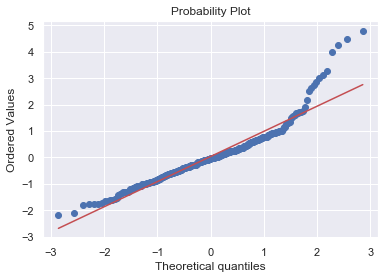

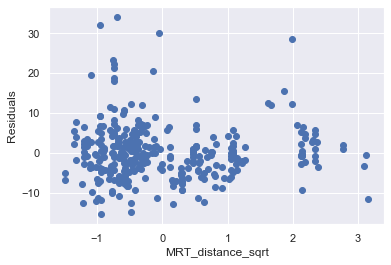

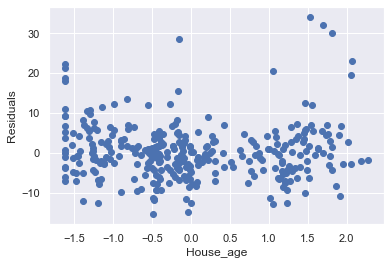

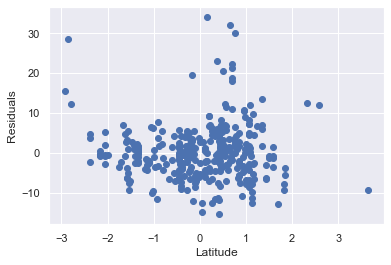

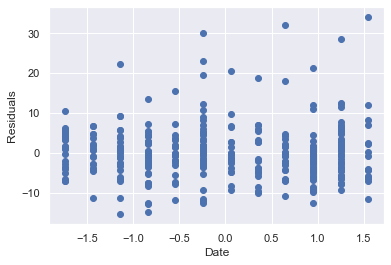

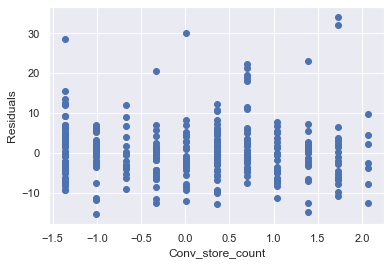

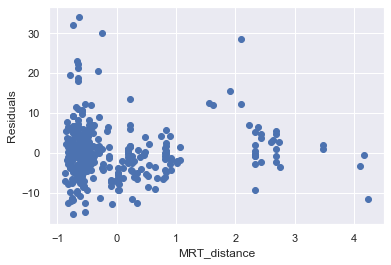

In [23]:
predictors = [ 'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count', 'MRT_distance' ]
Parameter = [ 'intercept' ,'MRT_distance_sqrt' ,'House_age','Latitude','Date'  ,'Conv_store_count', 'MRT_distance' , 'sigma' ]
X = (data_no_outlier[predictors].dropna()).to_numpy()
Model = Bayesian_framework(6,Parameter,X,Y)
proba_set = Gaussian_model_np(Model,nb_quad_term=0)

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros(8)
init[0]= 30
init[-1] = 10
step_size = 0.3
num_samples = 10000

M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

M_H.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H.compute_statistic(burn_in)
M_H.summary()
tool = Vizualisation_tool(Model,M_H)
tool.trace_visualization()
tool.autocorrelation_visualization()
tool.marginal_visualization()

tool.fidelity()
tool.diagnostics()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 217.29it/s]


Acceptance rate :  0.2953
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.23  0.40  [36.435, 38.022]  36.43  36.96  37.23   
1  MRT_distance_sqrt  -7.65  0.69  [-9.033, -6.261]  -9.06  -8.10  -7.64   
2          House_age  -2.92  0.40  [-3.714, -2.124]  -3.69  -3.20  -2.91   
3           Latitude   2.53  0.46    [1.600, 3.460]   1.64   2.21   2.53   
4               Date   1.53  0.40    [0.742, 2.327]   0.77   1.27   1.53   
5   Conv_store_count   2.31  0.53    [1.260, 3.362]   1.30   1.95   2.29   
6       MRT_distance   1.03  0.53   [-0.029, 2.095]   0.08   0.65   0.99   
7              sigma   7.40  0.30    [6.802, 7.998]   6.84   7.19   7.39   

    75.0   97.5  
0  37.49  38.03  
1  -7.15  -6.38  
2  -2.63  -2.15  
3   2.83   3.44  
4   1.81   2.32  
5   2.66   3.40  
6   1.38   2.17  
7   7.59   8.02  


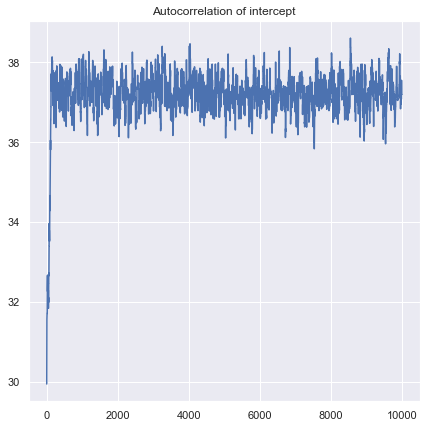

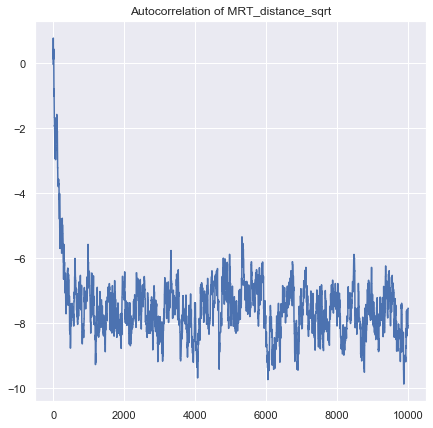

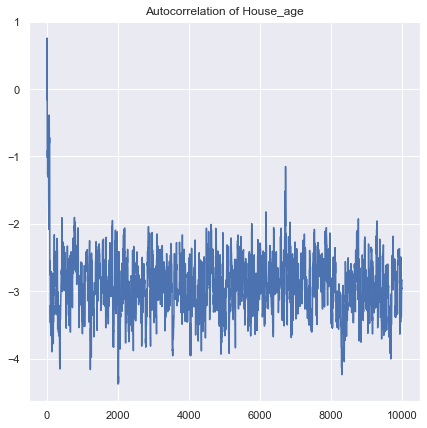

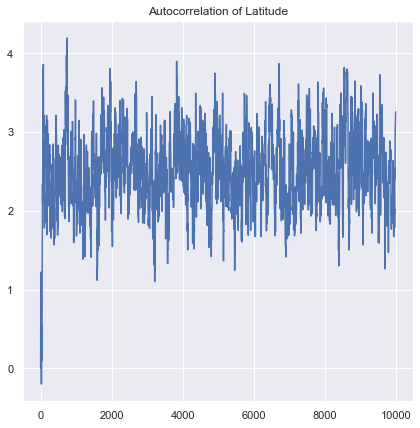

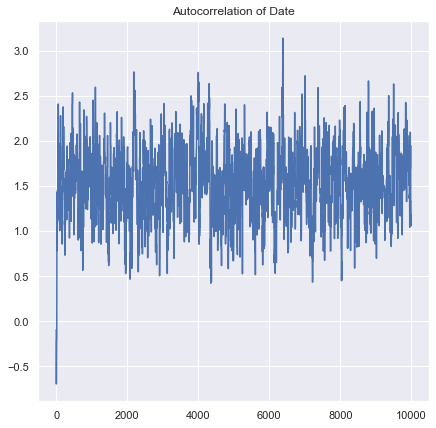

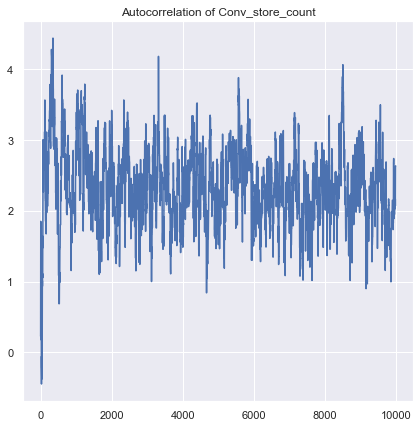

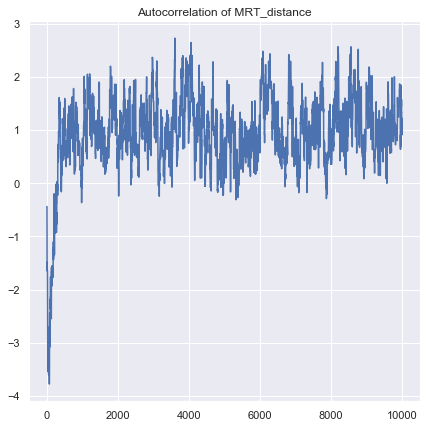

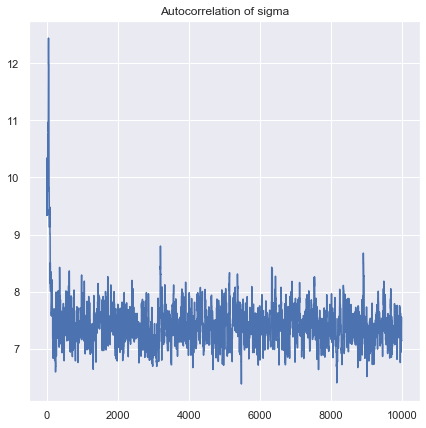

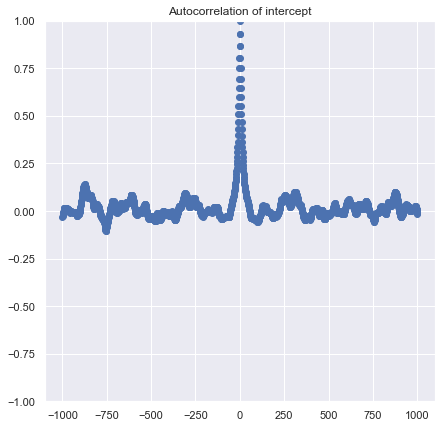

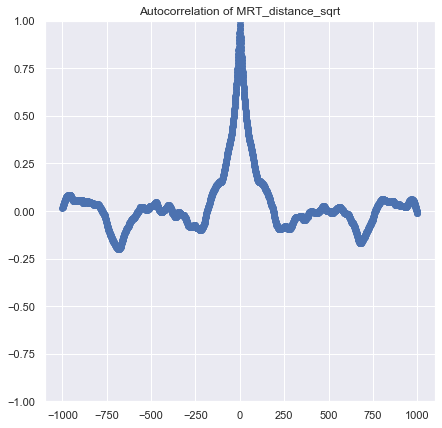

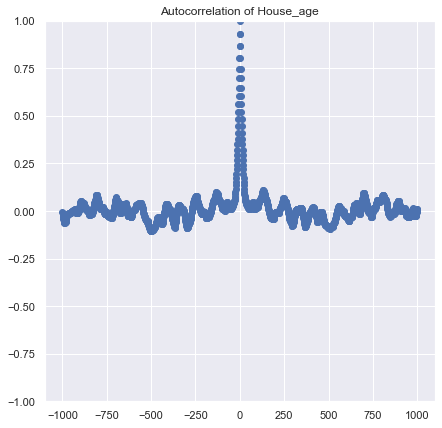

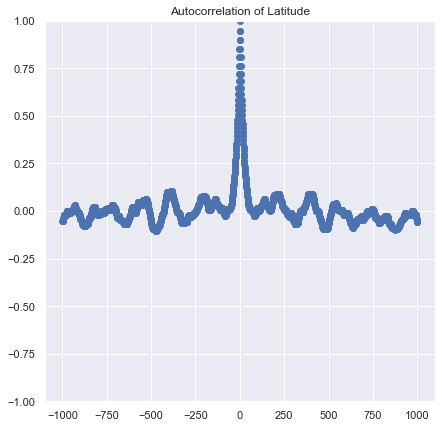

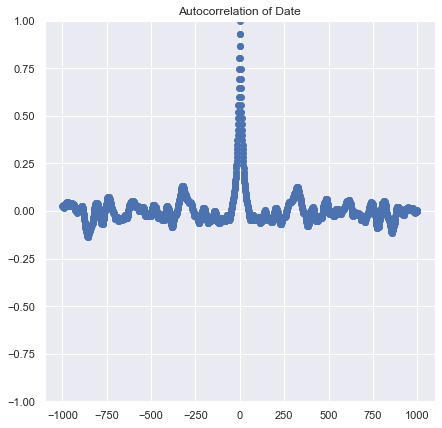

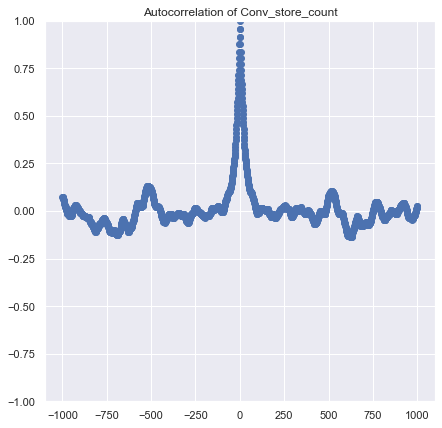

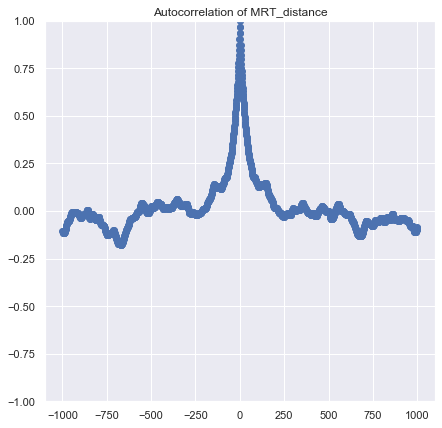

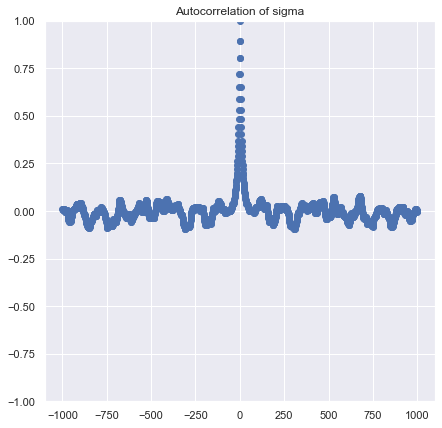

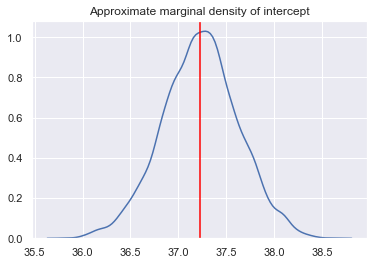

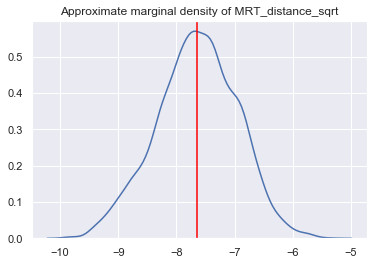

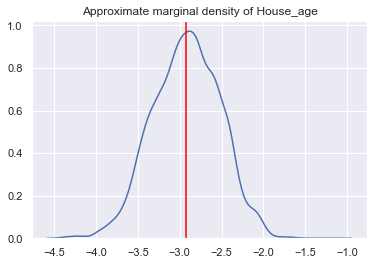

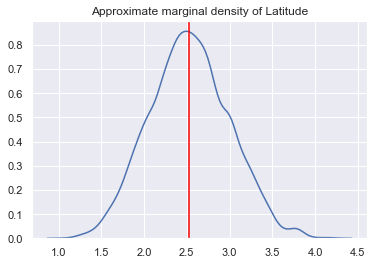

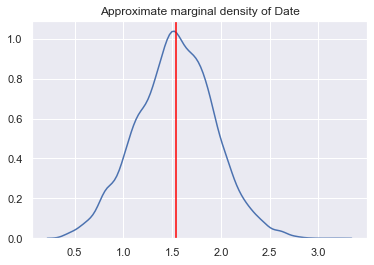

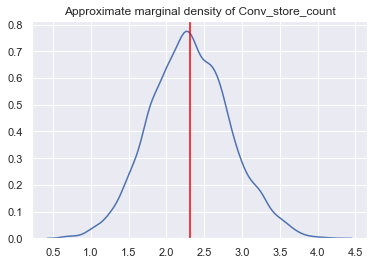

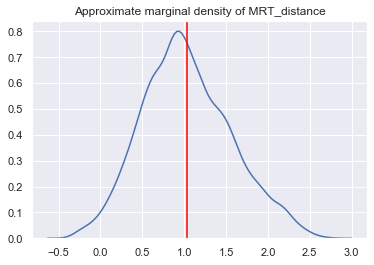

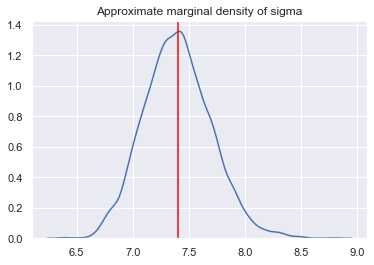

============ Fidelity summary ==================
 the mean square error is :  54.71306185670097
 MSE test is :  50.39395397128941
 PVE is  :  0.6648025711832977
 F   is  :  110.03299488680247
 p value :  1.1102230246251565e-16
 AIC is  :  2257.359824512084
 BIC is  :  2283.9322287674413
 AICc is :  2257.7087341694046


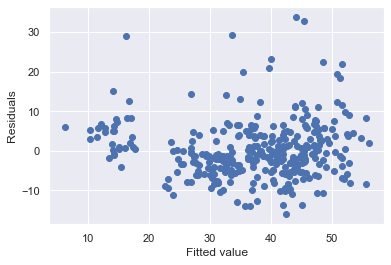

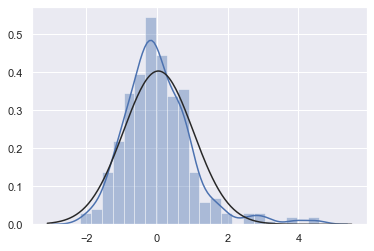

<Figure size 432x288 with 0 Axes>

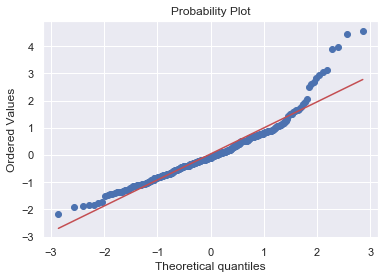

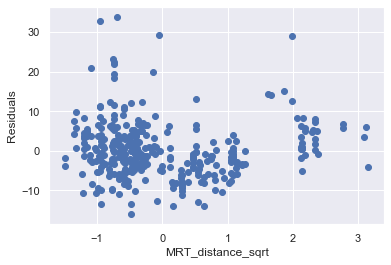

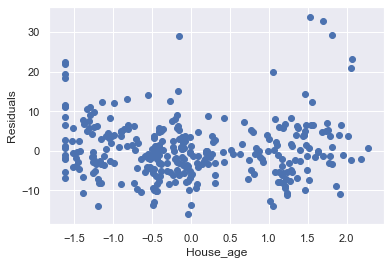

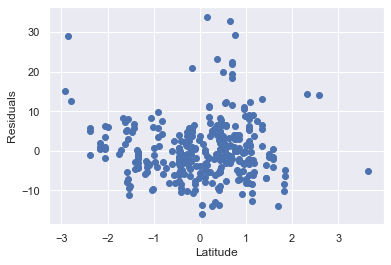

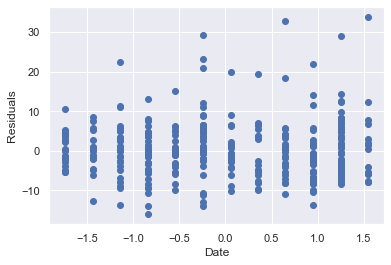

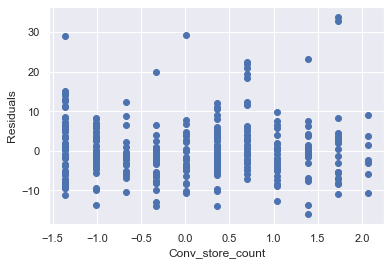

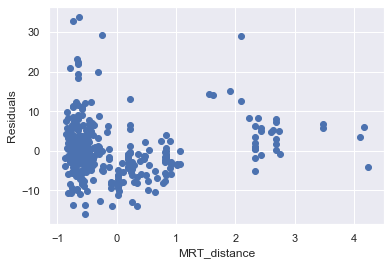

In [4]:
predictors = [ 'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count', 'MRT_distance' ]
Parameter = [ 'intercept' ,'MRT_distance_sqrt' ,'House_age','Latitude','Date'  ,'Conv_store_count', 'MRT_distance' , 'sigma' ]
X = (data_no_outlier[predictors].dropna()).to_numpy()
Model = Bayesian_framework(6,Parameter,X,Y)
proba_set = Gaussian_model_np(Model,nb_quad_term=1)

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros(8)
init[0]= 30
init[-1] = 10
step_size = 0.3
num_samples = 10000

M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

M_H.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H.compute_statistic(burn_in)
M_H.summary()
tool = Vizualisation_tool(Model,M_H)
tool.trace_visualization()
tool.autocorrelation_visualization()
tool.marginal_visualization()

tool.fidelity()
tool.diagnostics()

## Using GVA

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

 the loss is : tensor([1382.8595], grad_fn=<NegBackward>)
 the grad is : tensor([ -0.5567,  32.2798,  10.5182, -23.2652,  -1.9093, -25.4167, -22.0737])
 norm of the gradient  tensor(53.2081)


  0%|▎                                                                                 | 1/300 [00:01<06:43,  1.35s/it]

tensor([37.0478, -2.7728, -0.9035,  1.9985,  0.1640,  2.1833, 11.8961])


  3%|██▋                                                                              | 10/300 [00:12<06:08,  1.27s/it]

 the loss is : tensor([1170.0356], grad_fn=<NegBackward>)
 the grad is : tensor([-0.1338,  0.3490, -0.2658, -0.0015, -0.0733,  0.1566, -0.3840])
 norm of the gradient  tensor(0.6227)


  4%|██▉                                                                              | 11/300 [00:14<06:23,  1.33s/it]

tensor([37.3209, -6.5298, -2.8946,  2.4983,  1.5358,  2.4874,  7.5036])


  7%|█████▍                                                                           | 20/300 [00:26<06:25,  1.38s/it]

 the loss is : tensor([1169.3971], grad_fn=<NegBackward>)
 the grad is : tensor([0.1421, 0.0218, 0.1619, 0.0514, 0.0903, 0.1150, 0.2961])
 norm of the gradient  tensor(0.3982)


  7%|█████▋                                                                           | 21/300 [00:27<06:23,  1.37s/it]

tensor([37.3131, -6.6247, -2.9007,  2.4558,  1.5470,  2.4026,  7.4578])


  9%|███████▎                                                                         | 27/300 [00:36<06:34,  1.44s/it]

 Norm gradient < 0.5 stop 
 GVA method takes : 36.71  s to run 
            features      Coeff   std                CI    2.5       25.0  \
0          intercept  37.310001  0.45  [36.417, 38.205]  36.43  37.009998   
1  MRT_distance_sqrt  -6.620000  0.73  [-8.070, -5.168]  -8.06  -7.110000   
2          House_age  -2.920000  0.41  [-3.747, -2.095]  -3.73  -3.210000   
3           Latitude   2.460000  0.51    [1.452, 3.475]   1.48   2.120000   
4               Date   1.540000  0.42    [0.703, 2.374]   0.73   1.250000   
5   Conv_store_count   2.390000  0.65    [1.082, 3.697]   1.11   1.940000   
6              sigma   7.440000  0.31    [6.820, 8.064]   6.82   7.230000   

        50.0       75.0       97.5  
0  37.310001  37.610001  38.189999  
1  -6.610000  -6.130000  -5.220000  
2  -2.920000  -2.640000  -2.120000  
3   2.460000   2.810000   3.450000  
4   1.540000   1.820000   2.350000  
5   2.400000   2.830000   3.660000  
6   7.440000   7.650000   8.040000  


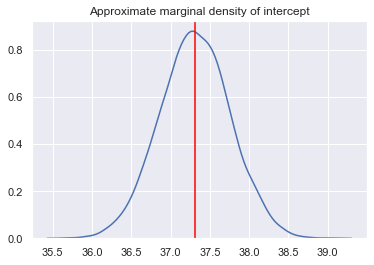

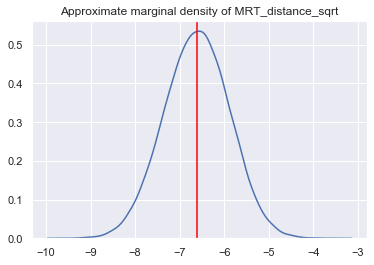

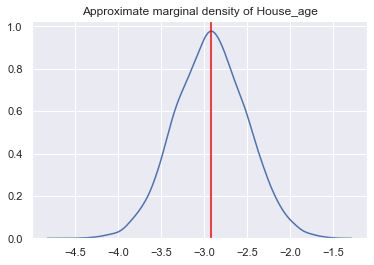

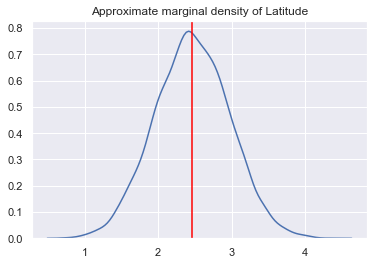

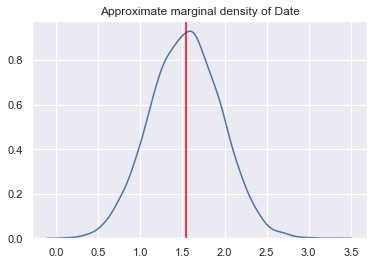

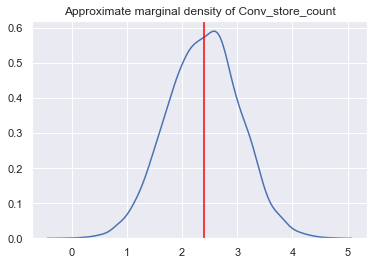

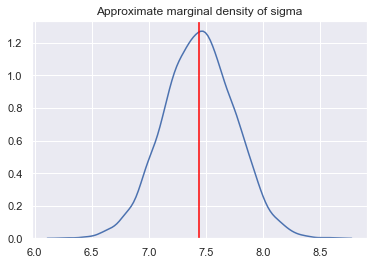

============ Fidelity summary ==================
 the mean square error is :  55.54000209512118
 MSE test is :  50.54940223863853
 PVE is  :  0.6640423782822379
 F   is  :  129.92490663160612
 p value :  1.1102230246251565e-16
 AIC is  :  2261.273075167838
 BIC is  :  2284.0494216724305
 AICc is :  2261.5339447330557


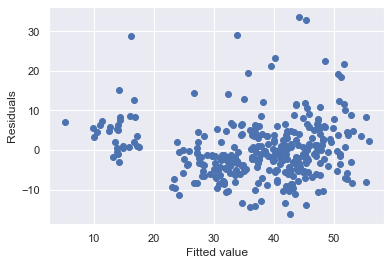

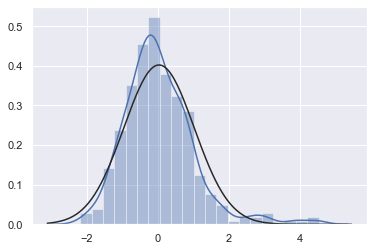

<Figure size 432x288 with 0 Axes>

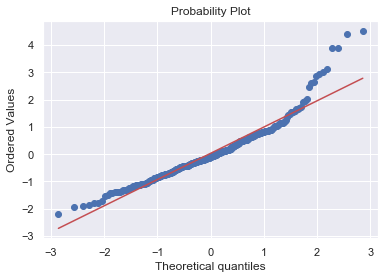

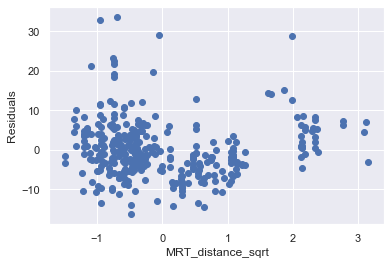

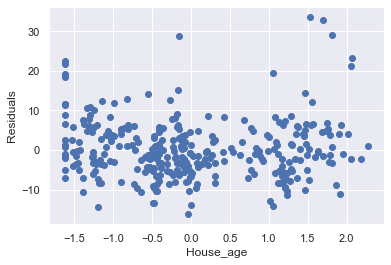

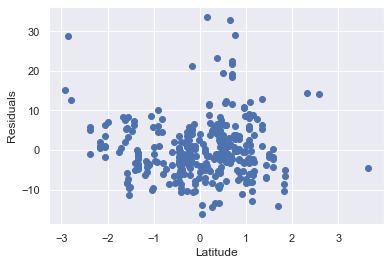

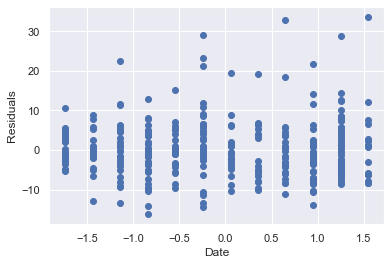

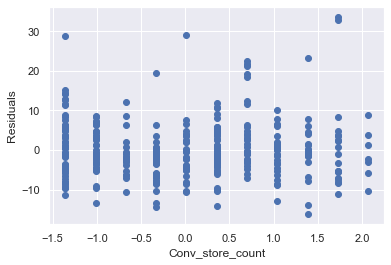

In [6]:
Parameter = [ 'intercept', 'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count','sigma']
predictors = [  'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count']
X = (data_no_outlier[predictors].dropna()).to_numpy()
Model = Bayesian_framework(5,Parameter,X,Y,torch_imp=True)
proba_set = Gaussian_model_gaussian_prior_torch(Model)

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
gva = GVA(Model)
init_mu = torch.zeros(7)
init_mu[0]= 37
init_mu[-1] = 10
init_L = -2*torch.ones(7,7)
gva.compute_GVA_algo(init_mu,init_L, step_size = 0.07, show = True , line_search = True , stop_crit = 0.2)

tool = Vizualisation_tool(Model,gva)
tool.marginal_visualization()    
tool.fidelity()
tool.diagnostics()


  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

 the loss is : tensor([1388.6428], grad_fn=<NegBackward>)
 the grad is : tensor([ -0.3077,  32.1076,  10.5277, -23.1343,  -1.8909, -25.2839,  29.7370,
        -21.7307])
 norm of the gradient  tensor(60.6332)



  0%|▎                                                                                 | 1/300 [00:01<06:53,  1.38s/it]

tensor([37.0211, -2.2064, -0.7235,  1.5898,  0.1299,  1.7375, -2.0435, 11.4933])



  3%|██▋                                                                              | 10/300 [00:12<06:06,  1.27s/it]

 the loss is : tensor([1179.9574], grad_fn=<NegBackward>)
 the grad is : tensor([-0.0281,  0.6477, -0.1911,  0.4527, -0.4306,  0.8169, -2.4293,  0.3675])
 norm of the gradient  tensor(2.7480)



  4%|██▉                                                                              | 11/300 [00:13<06:09,  1.28s/it]

tensor([37.2758, -5.1940, -2.9201,  2.4868,  1.4961,  2.7210, -0.6785,  7.5607])



  7%|█████▍                                                                           | 20/300 [00:25<06:04,  1.30s/it]

 the loss is : tensor([1171.1757], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.1483,  1.9922,  0.2532, -0.7106,  0.0834, -0.4887, -0.1681, -0.3742])
 norm of the gradient  tensor(2.2302)



  7%|█████▋                                                                           | 21/300 [00:26<06:10,  1.33s/it]

tensor([37.2825, -8.2636, -2.9226,  2.7319,  1.5159,  2.4715,  1.9790,  7.3840])



 10%|████████                                                                         | 30/300 [00:38<05:53,  1.31s/it]

 the loss is : tensor([1168.6687], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.1537,  1.8420,  0.2651, -0.5756,  0.3632, -0.5467,  0.1131, -0.1357])
 norm of the gradient  tensor(2.0689)



 10%|████████▎                                                                        | 31/300 [00:40<06:18,  1.41s/it]

tensor([37.2882, -9.4824, -2.8975,  2.7732,  1.5486,  2.3011,  3.1422,  7.2879])



 13%|██████████▊                                                                      | 40/300 [00:51<05:23,  1.24s/it]

 the loss is : tensor([1166.6906], grad_fn=<NegBackward>)
 the grad is : tensor([-0.2680,  1.6364,  0.3634, -0.7235,  0.2199, -0.6489,  0.3222, -1.2373])
 norm of the gradient  tensor(2.3472)



 14%|███████████                                                                      | 41/300 [00:53<06:04,  1.41s/it]

tensor([ 37.2719, -10.7272,  -2.8542,   2.8422,   1.5918,   2.1398,   4.3180,
          7.2209])



 17%|█████████████▌                                                                   | 50/300 [01:05<05:54,  1.42s/it]

 the loss is : tensor([1165.7056], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.0334,  0.9084, -0.0186, -0.2362,  0.1134, -0.0895, -0.0365,  0.0864])
 norm of the gradient  tensor(0.9550)



 17%|█████████████▊                                                                   | 51/300 [01:07<05:56,  1.43s/it]

tensor([ 37.2779, -11.6242,  -2.8907,   2.8956,   1.5806,   2.0287,   5.1194,
          7.1804])



 20%|████████████████▏                                                                | 60/300 [01:19<05:09,  1.29s/it]

 the loss is : tensor([1165.2341], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.1369,  0.4504, -0.0934, -0.1149, -0.0384, -0.0835, -0.3006, -0.4947])
 norm of the gradient  tensor(0.7662)



 20%|████████████████▍                                                                | 61/300 [01:20<05:15,  1.32s/it]

tensor([ 37.2688, -12.1907,  -2.8708,   2.9048,   1.5876,   1.9724,   5.6985,
          7.2038])



 23%|██████████████████▉                                                              | 70/300 [01:31<04:54,  1.28s/it]

 the loss is : tensor([1164.6095], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.0115,  0.2727,  0.1329,  0.1253,  0.0259,  0.1915, -0.2128,  0.2586])
 norm of the gradient  tensor(0.5073)



 24%|███████████████████▏                                                             | 71/300 [01:33<04:49,  1.26s/it]

tensor([ 37.2813, -12.7662,  -2.8875,   2.9362,   1.6195,   1.8762,   6.2555,
          7.1167])



 27%|█████████████████████▌                                                           | 80/300 [01:46<05:18,  1.45s/it]

 the loss is : tensor([1164.5808], grad_fn=<NegBackward>)
 the grad is : tensor([-0.0391,  0.4220,  0.0915, -0.1572,  0.0684, -0.0619,  0.0205, -0.0238])
 norm of the gradient  tensor(0.4714)



 27%|█████████████████████▊                                                           | 81/300 [01:47<05:12,  1.43s/it]

tensor([ 37.2906, -13.0242,  -2.8710,   2.9619,   1.6264,   1.8591,   6.4778,
          7.1467])



 30%|████████████████████████▎                                                        | 90/300 [02:00<04:52,  1.39s/it]

 the loss is : tensor([1164.4454], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.1346,  0.2310, -0.0156,  0.0521, -0.0789, -0.0821, -0.1094, -0.0312])
 norm of the gradient  tensor(0.3167)



 30%|████████████████████████▌                                                        | 91/300 [02:01<04:43,  1.35s/it]

tensor([ 37.2748, -13.2533,  -2.8518,   2.9555,   1.6480,   1.8683,   6.7083,
          7.1621])



 33%|██████████████████████████▋                                                     | 100/300 [02:15<05:13,  1.57s/it]

 the loss is : tensor([1164.3020], grad_fn=<NegBackward>)
 the grad is : tensor([-0.1649,  0.0674, -0.1452,  0.0816, -0.0345, -0.0438, -0.2089,  0.0804])
 norm of the gradient  tensor(0.3357)



 34%|██████████████████████████▉                                                     | 101/300 [02:17<04:55,  1.49s/it]

tensor([ 37.3032, -13.3832,  -2.8375,   2.9657,   1.6390,   1.8104,   6.8548,
          7.1268])



 37%|█████████████████████████████▎                                                  | 110/300 [02:29<04:10,  1.32s/it]

 the loss is : tensor([1164.2874], grad_fn=<NegBackward>)
 the grad is : tensor([-0.0901, -0.1013,  0.0716,  0.1841,  0.0653,  0.1413, -0.3041,  0.3243])
 norm of the gradient  tensor(0.5284)



 37%|█████████████████████████████▌                                                  | 111/300 [02:30<04:17,  1.36s/it]

tensor([ 37.2779, -13.5338,  -2.8803,   2.9617,   1.6403,   1.7895,   6.9839,
          7.1399])



 40%|████████████████████████████████                                                | 120/300 [02:44<04:41,  1.56s/it]

 the loss is : tensor([1164.1696], grad_fn=<NegBackward>)
 the grad is : tensor([-0.1062,  0.2664,  0.0289, -0.1429, -0.2059, -0.1345,  0.1121,  0.2366])
 norm of the gradient  tensor(0.4822)



 40%|████████████████████████████████▎                                               | 121/300 [02:45<04:38,  1.56s/it]

tensor([ 37.2864, -13.6369,  -2.8639,   2.9896,   1.6521,   1.7916,   7.0682,
          7.1242])



 43%|██████████████████████████████████▋                                             | 130/300 [02:59<04:11,  1.48s/it]

 the loss is : tensor([1164.0983], grad_fn=<NegBackward>)
 the grad is : tensor([-0.1227,  0.1411,  0.1241,  0.1165, -0.0805,  0.0511,  0.0105, -0.0802])
 norm of the gradient  tensor(0.2820)



 44%|██████████████████████████████████▉                                             | 131/300 [03:00<03:56,  1.40s/it]

tensor([ 37.3138, -13.7349,  -2.8801,   2.9718,   1.6463,   1.7621,   7.1338,
          7.1348])



 47%|█████████████████████████████████████▎                                          | 140/300 [03:13<03:56,  1.48s/it]

 the loss is : tensor([1164.2465], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.0204,  0.0549, -0.1941,  0.0992,  0.0284,  0.0465, -0.0629, -0.3005])
 norm of the gradient  tensor(0.3850)



 47%|█████████████████████████████████████▌                                          | 141/300 [03:15<03:54,  1.47s/it]

tensor([ 37.2997, -13.7793,  -2.8490,   2.9979,   1.6301,   1.7629,   7.2008,
          7.1469])



 50%|████████████████████████████████████████                                        | 150/300 [03:29<03:58,  1.59s/it]

 the loss is : tensor([1164.0820], grad_fn=<NegBackward>)
 the grad is : tensor([-0.2678, -0.0227, -0.0635,  0.0633,  0.0129, -0.0430, -0.1311,  0.0301])
 norm of the gradient  tensor(0.3168)



 50%|████████████████████████████████████████▎                                       | 151/300 [03:30<03:44,  1.50s/it]

tensor([ 37.3228, -13.8036,  -2.8421,   2.9939,   1.6477,   1.7800,   7.2776,
          7.1300])



 52%|█████████████████████████████████████████▌                                      | 156/300 [03:38<03:21,  1.40s/it]

 Norm gradient < 0.5 stop 
 GVA method takes : 218.25  s to run 
            features      Coeff   std                  CI        2.5  \
0          intercept  37.290001  0.39    [36.514, 38.075]  36.540001   
1  MRT_distance_sqrt -13.840000  0.60  [-15.041, -12.636] -14.990000   
2          House_age  -2.840000  0.38    [-3.611, -2.078]  -3.590000   
3           Latitude   3.010000  0.52      [1.972, 4.057]   2.000000   
4               Date   1.660000  0.37      [0.914, 2.406]   0.940000   
5   Conv_store_count   1.760000  0.63      [0.511, 3.012]   0.550000   
6       MRT_distance   7.280000  0.55      [6.192, 8.375]   6.210000   
7              sigma   7.130000  0.30      [6.543, 7.725]   6.550000   

        25.0       50.0       75.0       97.5  
0  37.029999  37.290001  37.560001  38.060001  
1 -14.250000 -13.840000 -13.430000 -12.680000  
2  -3.110000  -2.850000  -2.590000  -2.100000  
3   2.660000   3.010000   3.370000   4.040000  
4   1.410000   1.660000   1.910000   2.400000 

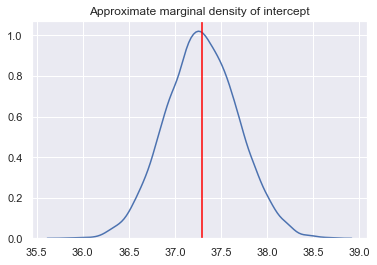

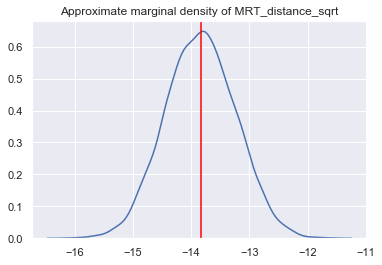

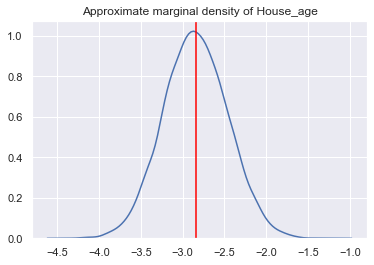

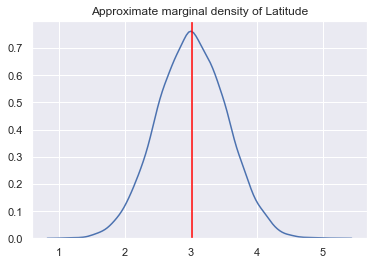

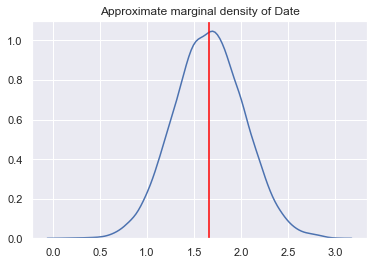

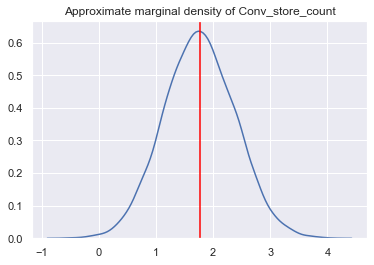

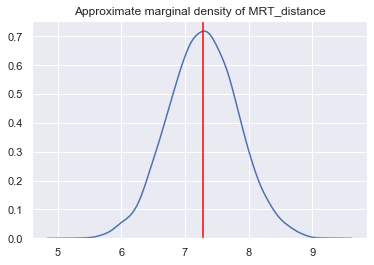

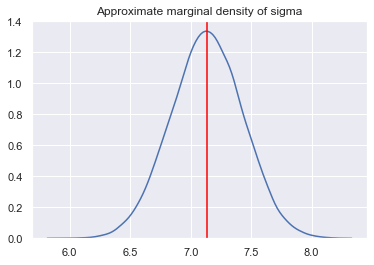

============ Fidelity summary ==================
 the mean square error is :  50.761082707399055
 MSE test is :  47.46404083999993
 PVE is  :  0.6765429277682736
 F   is  :  120.69401771771042
 p value :  1.1102230246251565e-16
 AIC is  :  2232.706988942825
 BIC is  :  2259.2793931981823
 AICc is :  2233.0558986001456


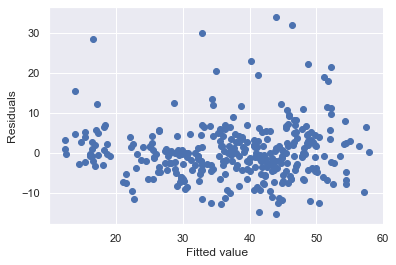

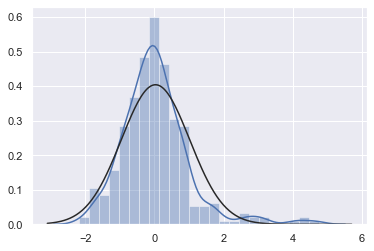

<Figure size 432x288 with 0 Axes>

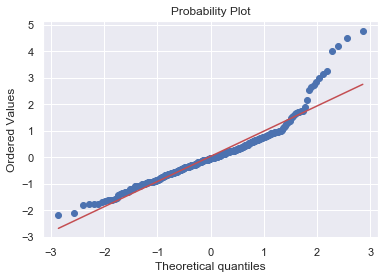

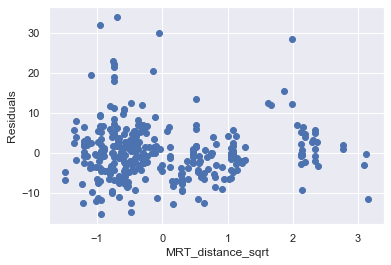

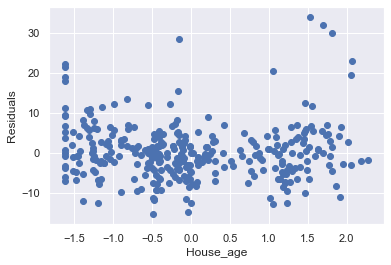

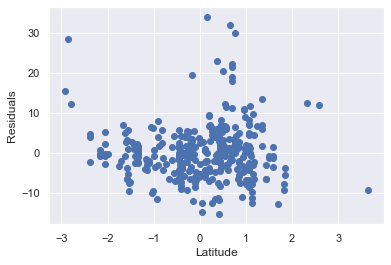

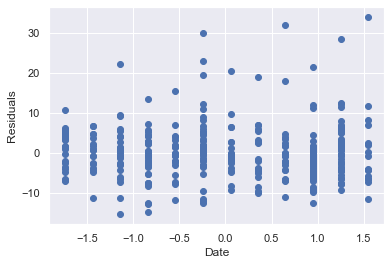

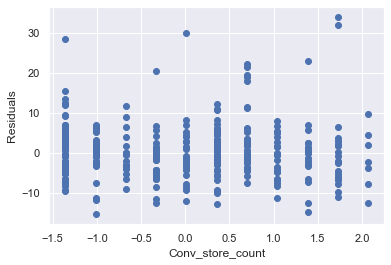

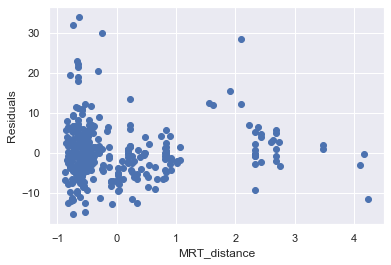

In [9]:
Parameter = [ 'intercept', 'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count','MRT_distance','sigma']
predictors = [  'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count','MRT_distance']
X = (data_no_outlier[predictors].dropna()).to_numpy()
Model = Bayesian_framework(6,Parameter,X,Y,torch_imp=True)
proba_set = Gaussian_model_gaussian_prior_torch(Model)

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
gva = GVA(Model)
init_mu = torch.zeros(8)
init_mu[0]= 37
init_mu[-1] = 10
init_L = -2*torch.ones(8,8)
gva.compute_GVA_algo(init_mu,init_L, step_size = 0.07, show = True , line_search = True , stop_crit = 0.4)

tool = Vizualisation_tool(Model,gva)
tool.marginal_visualization()    
tool.fidelity()
tool.diagnostics()

## Using Important Sampling

tensor([3218.8133], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([2152.5549], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1732.0031], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1574.8620], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1473.3834], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1352.2374], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1237.0778], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1196.8350], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1184.6039], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1176.9036], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1173.4121], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1170.5921], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1169.7006], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1169.2855], dtype=torch.float64, grad_fn=<NegBackward>)
 Mode find out 
 It takes : 10.78  s to find the mode 
            features  Coeff   std                

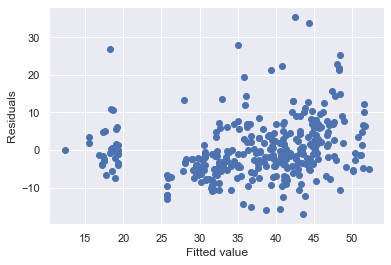

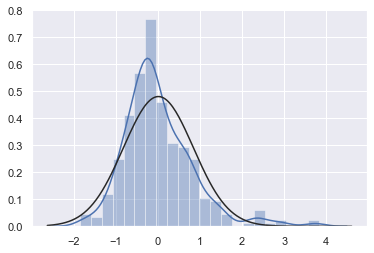

<Figure size 432x288 with 0 Axes>

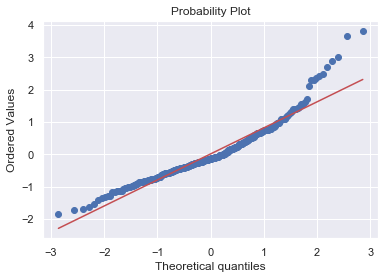

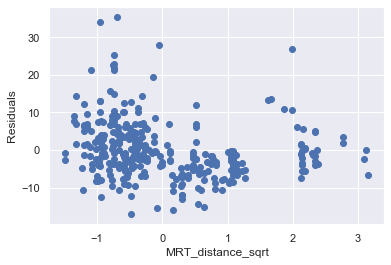

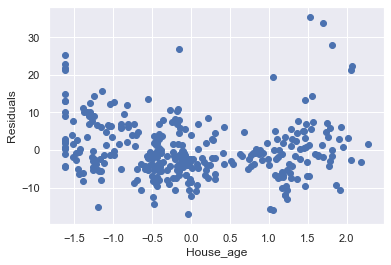

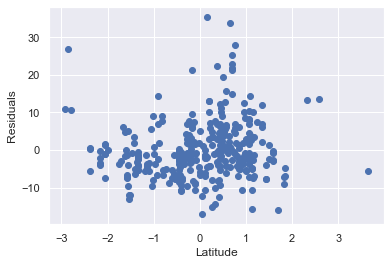

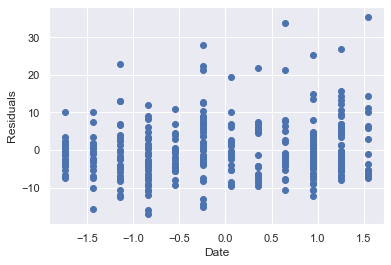

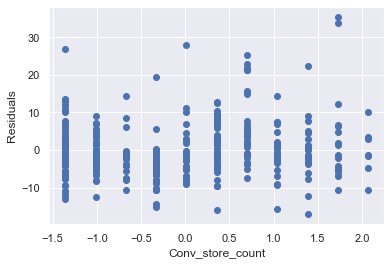

In [10]:
Parameter = [ 'intercept', 'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count','sigma']
predictors = [  'MRT_distance_sqrt' ,'House_age','Latitude', 'Date'  ,'Conv_store_count']
X = (data_no_outlier[predictors].dropna()).to_numpy()
Model = Bayesian_framework(5,Parameter,X,Y,torch_imp=True)
proba_set = Gaussian_model_gaussian_prior_torch(Model)

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
imp_s = Important_sampling(Model)
mean_proposal = imp_s.compute_mode_algo( line_search = True)
cov_mat = 0.5*np.ones(7)
proposal = st.multivariate_normal(mean = mean_proposal.view(-1).numpy() , cov = np.diag(cov_mat))
w,theta = imp_s.compute_algo(proposal , 1000000)
imp_s.compute_statistic()
imp_s.summary()

tool = Vizualisation_tool(Model,imp_s)
tool.fidelity()
tool.diagnostics()